In [1]:
import os
import sys
import numpy as np 
import pandas as pd
from PIL import Image, ImageOps
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import time
import shutil
import pickle

In [2]:
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator

In [3]:
os.environ['XLA_FLAGS']

'--xla_gpu_cuda_data_dir=/usr/lib/cuda'

In [4]:
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [5]:
if tf.config.list_physical_devices('GPU'):
    physical_devices = tf.config.list_physical_devices('GPU')
    tf.config.experimental.set_memory_growth(physical_devices[0], enable=True)
    tf.config.experimental.set_virtual_device_configuration(physical_devices[0], [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=8000)])

In [6]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

In [7]:
pd.set_option("display.max_columns", 100)
pd.set_option("display.max_rows", 200)
pd.set_option("display.max_colwidth",200)

# Stanford Dogs Dataset

The Stanford Dogs dataset contains images of 120 breeds of dogs from around the world. This dataset has been built using images and annotation from ImageNet for the task of fine-grained image categorization. Contents of this dataset:



-    Number of categories: 120
-    Number of images: 20,580
-    Annotations: Class labels, Bounding boxes


In [8]:
path = '/home/thomas/Documents/openclassroom/projet6/'
#pathImages = path + 'Images/'

#pathKerasTrain = path + 'kerasImages/train/'#Pillow preprocessed 120 dogs breeds
#pathKerasTest = path + 'kerasImages/test/'#Pillow preprocessed 120 dogs breeds




# Test Keras

take only two breeds from the pillow preprocessing

In [9]:
pathKerasTestTrain = path + 'kerasTest/train/'#Pillow preprocessed 2 dogs breeds
pathKerasTestTest = path + 'kerasTest/test/'#Pillow preprocessed 2 dogs breeds

In [10]:
batch_size = 32
minHeight = 259
minWidth = 288

In [11]:
train_test =tf.keras.utils.image_dataset_from_directory(
    pathKerasTestTrain,
    color_mode='grayscale',
    batch_size=32,
    image_size=(minHeight, minWidth),
    shuffle=True,
    seed=42,
    validation_split=None,
    subset=None,
    interpolation='bicubic', #'bilinear', bicubic same think as pillow
    follow_links=False, # follow symlink
    crop_to_aspect_ratio=False
)


Found 3708 files belonging to 2 classes.


In [12]:
validation_test =tf.keras.utils.image_dataset_from_directory(
    pathKerasTestTest,
    color_mode='grayscale',
    batch_size=32,
    image_size=(minHeight, minWidth),
    shuffle=True,
    seed=42,
    validation_split=None,
    subset=None,
    interpolation= 'bicubic', #'bilinear', bicubic same think as pillow
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 106 files belonging to 2 classes.


In [13]:
class_names = train_test.class_names
print(class_names)

['Afghan_hound', 'Samoyed']


In [14]:
# model
num_classes = len(class_names)

model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255, input_shape=(minHeight, minWidth, 1)),
  tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='softmax'),
  tf.keras.layers.Dense(num_classes)
])

In [15]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-2),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 259, 288, 1)       0         
                                                                 
 conv2d (Conv2D)             (None, 259, 288, 16)      160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 129, 144, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 129, 144, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 72, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 72, 64)        1

In [17]:
startTime =time.time()
epochs=40
history = model.fit(
  train_test,
  validation_data=validation_test,
  epochs=epochs
)
endTime =time.time()
execTime = endTime-startTime
print(f"execution time:{execTime}s")

Epoch 1/40
116/116 [==============================] - 30s 94ms/step - loss: 7.2882 - accuracy: 0.4690 - val_loss: 7.2759 - val_accuracy: 0.5094
Epoch 2/40
116/116 [==============================] - 3s 26ms/step - loss: 7.2882 - accuracy: 0.4690 - val_loss: 7.2759 - val_accuracy: 0.5094
Epoch 3/40
116/116 [==============================] - 3s 28ms/step - loss: 7.2882 - accuracy: 0.4690 - val_loss: 7.2759 - val_accuracy: 0.5094
Epoch 4/40
116/116 [==============================] - 3s 28ms/step - loss: 7.2882 - accuracy: 0.4690 - val_loss: 7.2759 - val_accuracy: 0.5094
Epoch 5/40
116/116 [==============================] - 3s 27ms/step - loss: 7.2882 - accuracy: 0.4690 - val_loss: 7.2759 - val_accuracy: 0.5094
Epoch 6/40
116/116 [==============================] - 3s 27ms/step - loss: 7.2882 - accuracy: 0.4690 - val_loss: 7.2759 - val_accuracy: 0.5094
Epoch 7/40
116/116 [==============================] - 3s 27ms/step - loss: 7.2882 - accuracy: 0.4690 - val_loss: 7.2759 - val_accuracy: 0.509

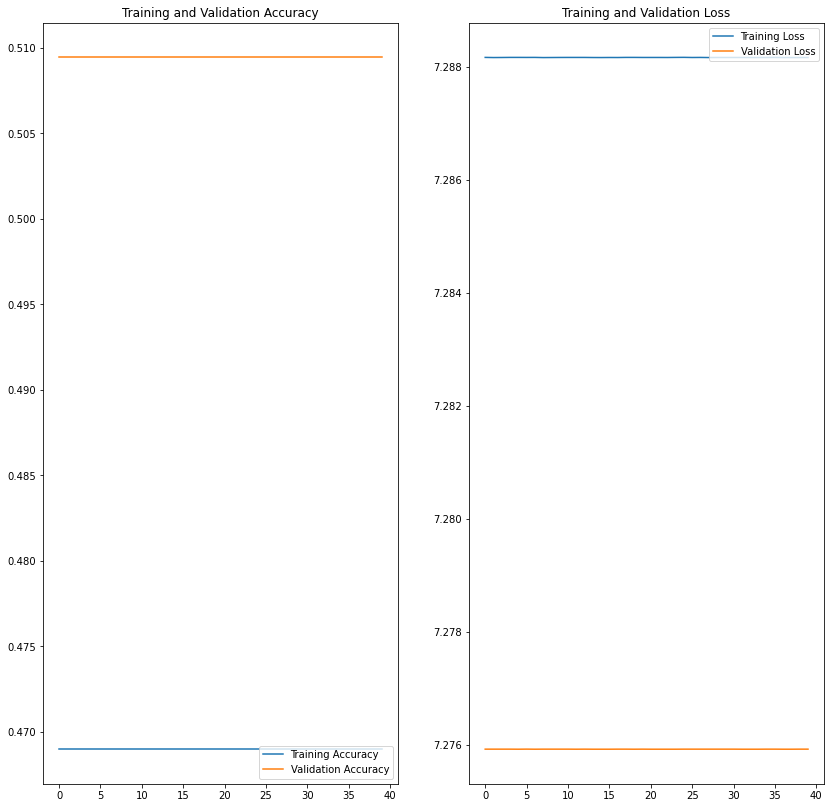

In [18]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)



plt.figure(figsize=(14, 14))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


## Keras

datasets creation

In [19]:
minHeight = 259
minWidth = 288

In [20]:
Train10 = path + '10_breeds/train/'#Pillow preprocessed 10 dogs breeds
Test10 = path + '10_breeds/test/'#Pillow preprocessed 10 dogs breeds
val10 = path + '10_breeds/validation/'#Pillow preprocessed 10 dogs breeds

In [ ]:
batch_size = 32
minHeight = 259
minWidth = 288

In [30]:

train_ds =tf.keras.utils.image_dataset_from_directory(
    Train10,
    
    color_mode='grayscale',
    batch_size=32,
    image_size=(minHeight, minWidth),
    shuffle=True,
    seed=42,
    validation_split=None,
    subset=None,
    interpolation='bicubic', #'bilinear', bicubic same think as pillow
    follow_links=False, # follow symlink
    crop_to_aspect_ratio=False
)


Found 17832 files belonging to 10 classes.


In [31]:
val_ds =tf.keras.utils.image_dataset_from_directory(
    val10,
    
    color_mode='grayscale',
    batch_size=32,
    image_size=(minHeight, minWidth),
    shuffle=True,
    seed=42,
    validation_split=None,
    subset=None,
    interpolation= 'bicubic', #'bilinear', bicubic same think as pillow
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 510 files belonging to 10 classes.


In [32]:
class_names = train_ds.class_names
print(class_names)


['Afghan_hound', 'Bernese_mountain_dog', 'Great_Pyrenees', 'Irish_wolfhound', 'Leonberg', 'Maltese_dog', 'Pomeranian', 'Samoyed', 'Scottish_deerhound', 'Shih-Tzu']


### Configure the dataset for performance

In [33]:
AUTOTUNE = tf.data.AUTOTUNE

#train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
#val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)


The first time the dataset is iterated over, its elements will be cached either in the specified file or in memory. Subsequent iterations will use the cached data.

Note: Like other `Dataset` methods, prefetch operates on the elements of the input dataset. It has no concept of examples vs. batches. `examples.prefetch(2)` will prefetch two elements (2 examples), while `examples.batch(20).prefetch(2)` will prefetch 2 elements (2 batches, of 20 examples each).

### Standardize the data

The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network; in general you should seek to make your input values small.

Here, you will standardize values to be in the `[0, 1]` range by using `tf.keras.layers.Rescaling`.

In [34]:
normalization_layer = tf.keras.layers.Rescaling(1./255)


To rescale an input in the `[0, 255]` range to be in the `[-1, 1]` range, you would pass `scale=1./127.5`, `offset=-1`.

## A basic Keras model

The Keras `Sequential` model consists of three convolution blocks (`tf.keras.layers.Conv2D`) with a max pooling layer (`tf.keras.layers.MaxPooling2D`) in each of them. There's a fully-connected layer (`tf.keras.layers.Dense`) with 128 units on top of it that is activated by a ReLU activation function (`'relu'`). This model has not been tuned for high accuracy; the goal of this tutorial is to show a standard approach.



In [36]:
num_classes = len(class_names)

model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255, input_shape=(minHeight, minWidth, 1)),
  tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(num_classes, activation='softmax')
])


### Compile the model

For this tutorial, choose the `tf.keras.optimizers.Adam` optimizer and `tf.keras.losses.SparseCategoricalCrossentropy` loss function. To view training and validation accuracy for each training epoch, pass the metrics argument to `Model.compile`.

In [37]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])


### Model summary

View all the layers of the network using the Keras `Model.summary` method:

In [38]:

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_3 (Rescaling)     (None, 259, 288, 1)       0         
                                                                 
 conv2d_32 (Conv2D)          (None, 259, 288, 16)      160       
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 129, 144, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_33 (Conv2D)          (None, 129, 144, 32)      4640      
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 64, 72, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_34 (Conv2D)          (None, 64, 72, 64)       

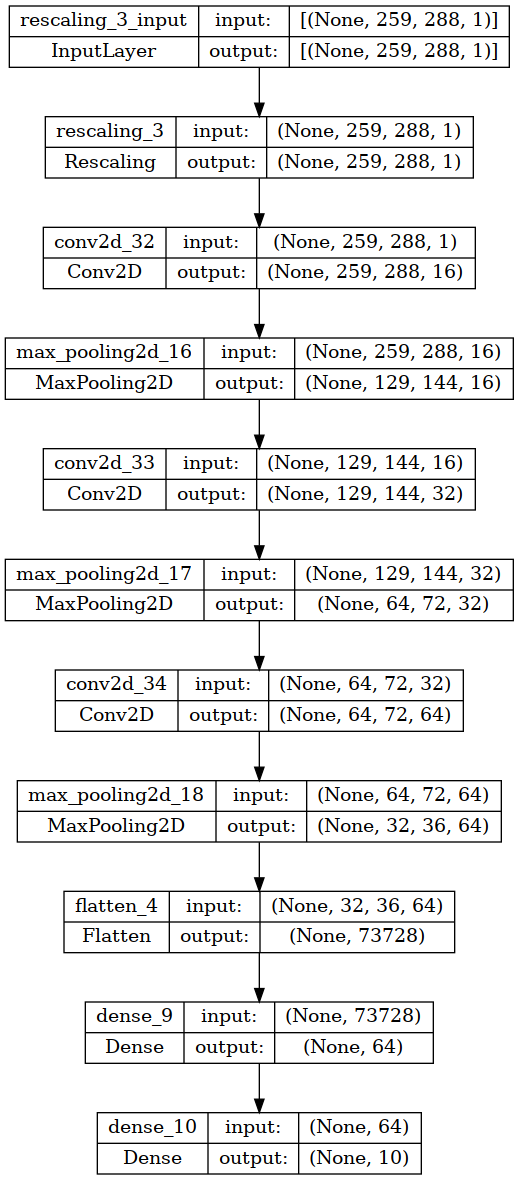

In [39]:
tf.keras.utils.plot_model(model,'model.png', show_shapes=True,show_layer_names=True)

### Train the model

Train the model for 20 epochs with the Keras `Model.fit` method:

In [40]:
batch_size=32
train_size=512

startTime =time.time()
epochs=20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  
)
endTime =time.time()
execTime = endTime-startTime
print(f"execution time:{execTime}s")

Epoch 1/20
558/558 [==============================] - 220s 377ms/step - loss: 2.0262 - accuracy: 0.2467 - val_loss: 2.1685 - val_accuracy: 0.1824
Epoch 2/20
558/558 [==============================] - 13s 24ms/step - loss: 1.7224 - accuracy: 0.3705 - val_loss: 2.4994 - val_accuracy: 0.1922
Epoch 3/20
558/558 [==============================] - 13s 24ms/step - loss: 1.4015 - accuracy: 0.4970 - val_loss: 3.1595 - val_accuracy: 0.2000
Epoch 4/20
558/558 [==============================] - 13s 24ms/step - loss: 0.9200 - accuracy: 0.6760 - val_loss: 5.2914 - val_accuracy: 0.2000
Epoch 5/20
558/558 [==============================] - 13s 24ms/step - loss: 0.4644 - accuracy: 0.8369 - val_loss: 7.1546 - val_accuracy: 0.1765
Epoch 6/20
558/558 [==============================] - 13s 24ms/step - loss: 0.2204 - accuracy: 0.9259 - val_loss: 10.6061 - val_accuracy: 0.1843
Epoch 7/20
558/558 [==============================] - 13s 24ms/step - loss: 0.1290 - accuracy: 0.9593 - val_loss: 11.6070 - val_accur

### Visualize training results

Create plots of the loss and accuracy on the training and validation sets:

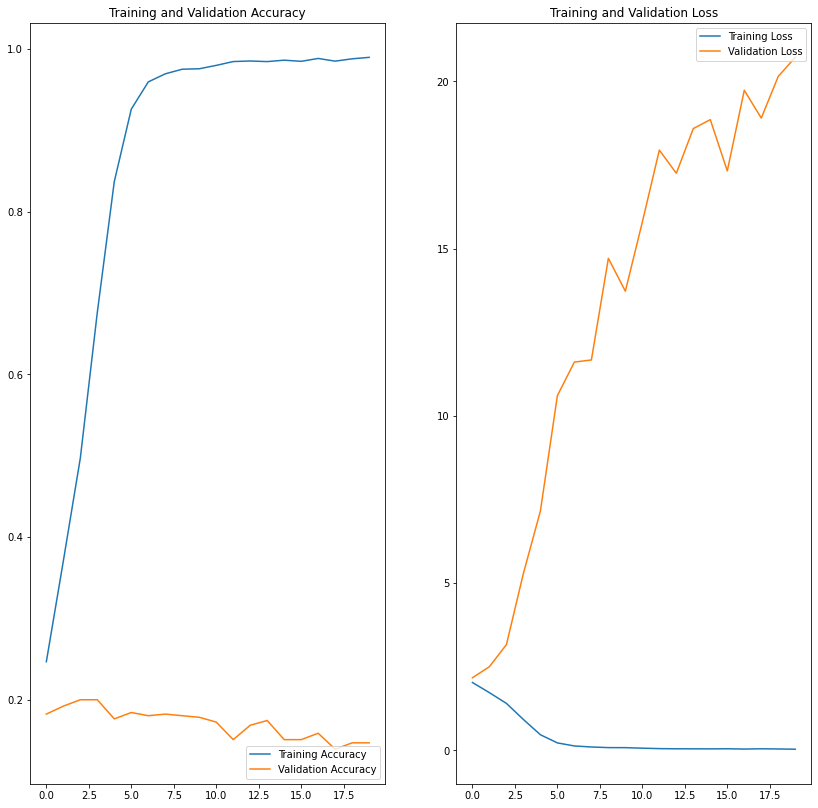

In [41]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

pillow_results = {'basic':{'acc':acc,'val_acc':val_acc,'loss':loss,'val_loss':val_loss,'epochs':epochs_range}}

plt.figure(figsize=(14, 14))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [21]:
sys.getsizeof(model)

48

prbably overfitting

## Model with dropout 0.4

In [22]:
num_classes = len(class_names)

model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255, input_shape=(minHeight, minWidth, 1)),
  tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Dropout(0.4),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(num_classes, activation='softmax')
])

In [23]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [24]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 259, 288, 1)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 259, 288, 16)      160       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 129, 144, 16)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 129, 144, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 64, 72, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 64, 72, 64)       

In [25]:
startTime =time.time()
epochs=20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)
endTime =time.time()
execTime = endTime-startTime
print(f"execution time:{execTime}s")

Epoch 1/20
558/558 [==============================] - 22s 37ms/step - loss: 2.0705 - accuracy: 0.2287 - val_loss: 2.3106 - val_accuracy: 0.1771
Epoch 2/20
558/558 [==============================] - 21s 37ms/step - loss: 1.8120 - accuracy: 0.3378 - val_loss: 2.4837 - val_accuracy: 0.2053
Epoch 3/20
558/558 [==============================] - 21s 37ms/step - loss: 1.6055 - accuracy: 0.4191 - val_loss: 2.6088 - val_accuracy: 0.1850
Epoch 4/20
558/558 [==============================] - 21s 37ms/step - loss: 1.3669 - accuracy: 0.5103 - val_loss: 3.6744 - val_accuracy: 0.1755
Epoch 5/20
558/558 [==============================] - 21s 37ms/step - loss: 1.0892 - accuracy: 0.6104 - val_loss: 4.8315 - val_accuracy: 0.1614
Epoch 6/20
558/558 [==============================] - 21s 37ms/step - loss: 0.8464 - accuracy: 0.7018 - val_loss: 5.6251 - val_accuracy: 0.1818
Epoch 7/20
558/558 [==============================] - 21s 37ms/step - loss: 0.6681 - accuracy: 0.7631 - val_loss: 6.7440 - val_accuracy:

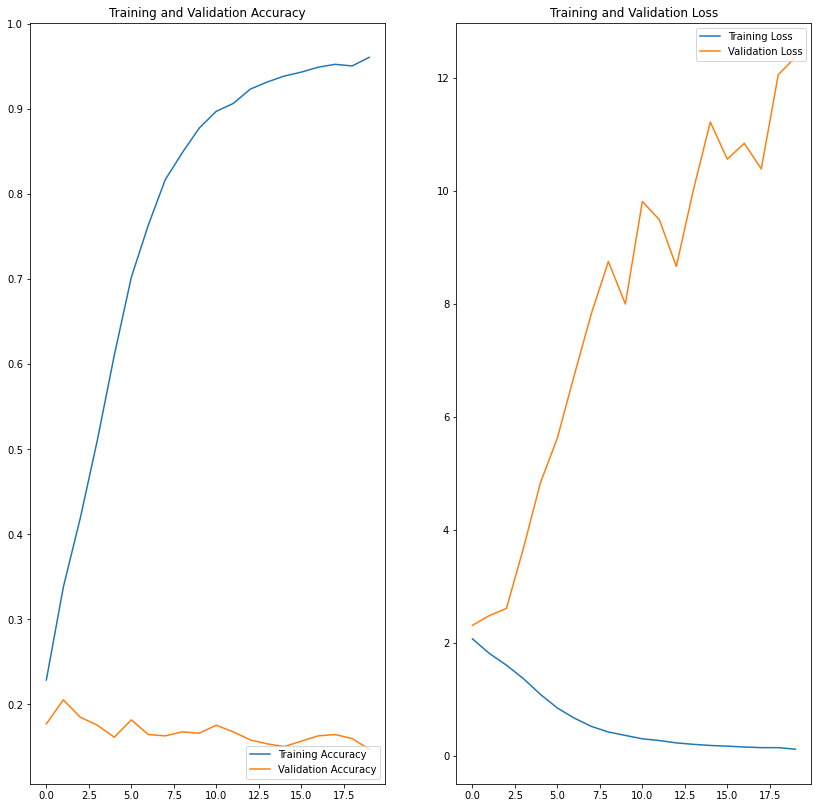

In [26]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

pillow_results['dropout04']={'acc':acc,'val_acc':val_acc,'loss':loss,'val_loss':val_loss,'epochs':epochs_range}

plt.figure(figsize=(14, 14))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


## Model 2 with dropout 0.2 softmax activation

In [27]:
num_classes = len(class_names)

model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255, input_shape=(minHeight, minWidth, 1)),
  tf.keras.layers.Conv2D(16, 5, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Dropout(0.2),
  # 1 hidden layer softmax activation
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(64, activation='softmax'),
  tf.keras.layers.Dense(num_classes, activation='softmax')
])

In [28]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [29]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_3 (Rescaling)     (None, 259, 288, 1)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 259, 288, 16)      416       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 129, 144, 16)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 129, 144, 32)      4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 64, 72, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 64, 72, 64)       

In [30]:
startTime =time.time()
epochs=30
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)
endTime =time.time()
execTime = endTime-startTime
print(f"execution time:{execTime}s")

Epoch 1/30
558/558 [==============================] - 24s 40ms/step - loss: 2.2911 - accuracy: 0.1283 - val_loss: 2.3011 - val_accuracy: 0.1097
Epoch 2/30
558/558 [==============================] - 22s 40ms/step - loss: 2.3009 - accuracy: 0.1119 - val_loss: 2.3005 - val_accuracy: 0.1144
Epoch 3/30
558/558 [==============================] - 22s 40ms/step - loss: 2.3008 - accuracy: 0.1132 - val_loss: 2.3006 - val_accuracy: 0.1144
Epoch 4/30
558/558 [==============================] - 22s 40ms/step - loss: 2.3009 - accuracy: 0.1139 - val_loss: 2.3005 - val_accuracy: 0.1144
Epoch 5/30
558/558 [==============================] - 22s 39ms/step - loss: 2.3008 - accuracy: 0.1144 - val_loss: 2.3006 - val_accuracy: 0.1144
Epoch 6/30
558/558 [==============================] - 22s 39ms/step - loss: 2.3008 - accuracy: 0.1137 - val_loss: 2.3006 - val_accuracy: 0.1144
Epoch 7/30
558/558 [==============================] - 22s 39ms/step - loss: 2.3008 - accuracy: 0.1136 - val_loss: 2.3005 - val_accuracy:

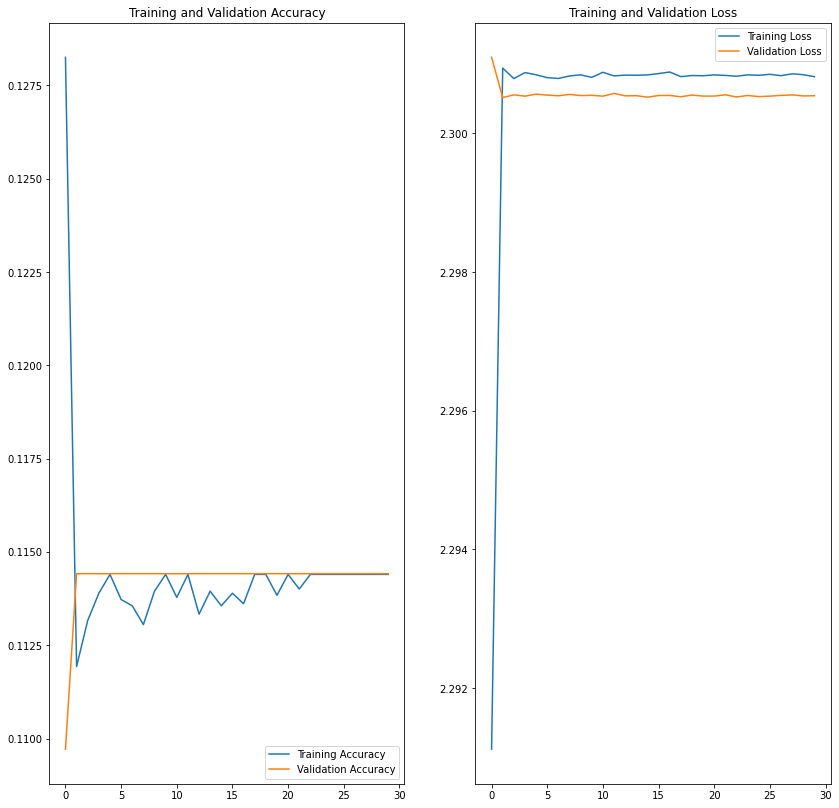

In [31]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

pillow_results['dropout02_softmax']={'acc':acc,'val_acc':val_acc,'loss':loss,'val_loss':val_loss,'epochs':epochs_range}

plt.figure(figsize=(14, 14))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


## Model 3 with dropout softmax activation 2 hidden layers

In [32]:
num_classes = len(class_names)

model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255, input_shape=(minHeight, minWidth, 1)),
  tf.keras.layers.Conv2D(16, 5, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Dropout(0.2),
  # 2 hidden layer softmax activation
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='softmax'),
  tf.keras.layers.Dense(64, activation='softmax'),
  tf.keras.layers.Dense(num_classes, activation='softmax')
])

In [33]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [34]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_4 (Rescaling)     (None, 259, 288, 1)       0         
                                                                 
 conv2d_9 (Conv2D)           (None, 259, 288, 16)      416       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 129, 144, 16)     0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 129, 144, 32)      4640      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 64, 72, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 64, 72, 64)       

In [35]:
startTime =time.time()
epochs=15
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)
endTime =time.time()
execTime = endTime-startTime
print(f"execution time:{execTime}s")

Epoch 1/15
558/558 [==============================] - 24s 40ms/step - loss: 2.2994 - accuracy: 0.1136 - val_loss: 2.3005 - val_accuracy: 0.1144
Epoch 2/15
558/558 [==============================] - 22s 40ms/step - loss: 2.3009 - accuracy: 0.1129 - val_loss: 2.3005 - val_accuracy: 0.1144
Epoch 3/15
558/558 [==============================] - 22s 40ms/step - loss: 2.3009 - accuracy: 0.1139 - val_loss: 2.3006 - val_accuracy: 0.1144
Epoch 4/15
558/558 [==============================] - 23s 40ms/step - loss: 2.3009 - accuracy: 0.1144 - val_loss: 2.3006 - val_accuracy: 0.1144
Epoch 5/15
558/558 [==============================] - 22s 40ms/step - loss: 2.3009 - accuracy: 0.1134 - val_loss: 2.3006 - val_accuracy: 0.1144
Epoch 6/15
558/558 [==============================] - 22s 40ms/step - loss: 2.3008 - accuracy: 0.1141 - val_loss: 2.3006 - val_accuracy: 0.1144
Epoch 7/15
558/558 [==============================] - 22s 40ms/step - loss: 2.3009 - accuracy: 0.1144 - val_loss: 2.3006 - val_accuracy:

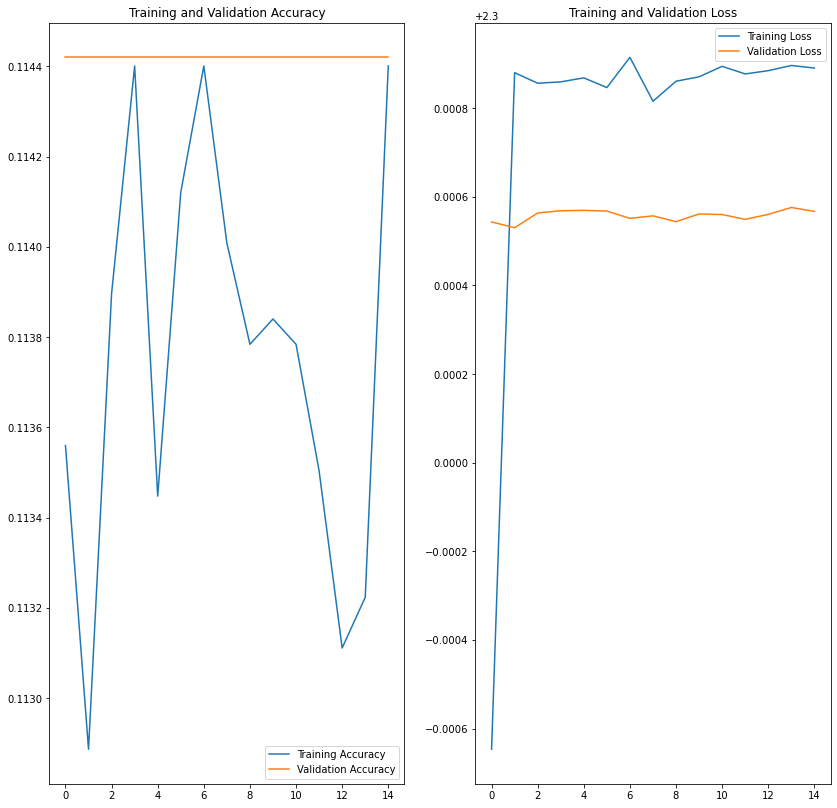

In [36]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

pillow_results['dropout02_softmax_2hidden']={'acc':acc,'val_acc':val_acc,'loss':loss,'val_loss':val_loss,'epochs':epochs_range}

plt.figure(figsize=(14, 14))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## model 4 dropout 0.2 activation relu +2 hidden layers

In [37]:
num_classes = len(class_names)

model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255, input_shape=(minHeight, minWidth, 1)),
  tf.keras.layers.Conv2D(32, 5, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Dropout(0.2),
  # 2 hidden layers
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),   
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(num_classes, activation='softmax')
])

In [38]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [39]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_5 (Rescaling)     (None, 259, 288, 1)       0         
                                                                 
 conv2d_12 (Conv2D)          (None, 259, 288, 32)      832       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 129, 144, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 129, 144, 32)      9248      
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 64, 72, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 64, 72, 64)       

In [40]:
startTime =time.time()
epochs=30
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)
endTime =time.time()
execTime = endTime-startTime
print(f"execution time:{execTime}s")

Epoch 1/30
558/558 [==============================] - 39s 66ms/step - loss: 2.0807 - accuracy: 0.2230 - val_loss: 2.2180 - val_accuracy: 0.1803
Epoch 2/30
558/558 [==============================] - 36s 65ms/step - loss: 1.8253 - accuracy: 0.3282 - val_loss: 2.5493 - val_accuracy: 0.1724
Epoch 3/30
558/558 [==============================] - 36s 65ms/step - loss: 1.5564 - accuracy: 0.4334 - val_loss: 3.5967 - val_accuracy: 0.1708
Epoch 4/30
558/558 [==============================] - 37s 65ms/step - loss: 1.1609 - accuracy: 0.5836 - val_loss: 5.1106 - val_accuracy: 0.1614
Epoch 5/30
558/558 [==============================] - 37s 65ms/step - loss: 0.7524 - accuracy: 0.7365 - val_loss: 7.2133 - val_accuracy: 0.1489
Epoch 6/30
558/558 [==============================] - 37s 65ms/step - loss: 0.4591 - accuracy: 0.8402 - val_loss: 9.7058 - val_accuracy: 0.1520
Epoch 7/30
558/558 [==============================] - 36s 65ms/step - loss: 0.3148 - accuracy: 0.8916 - val_loss: 10.3047 - val_accuracy

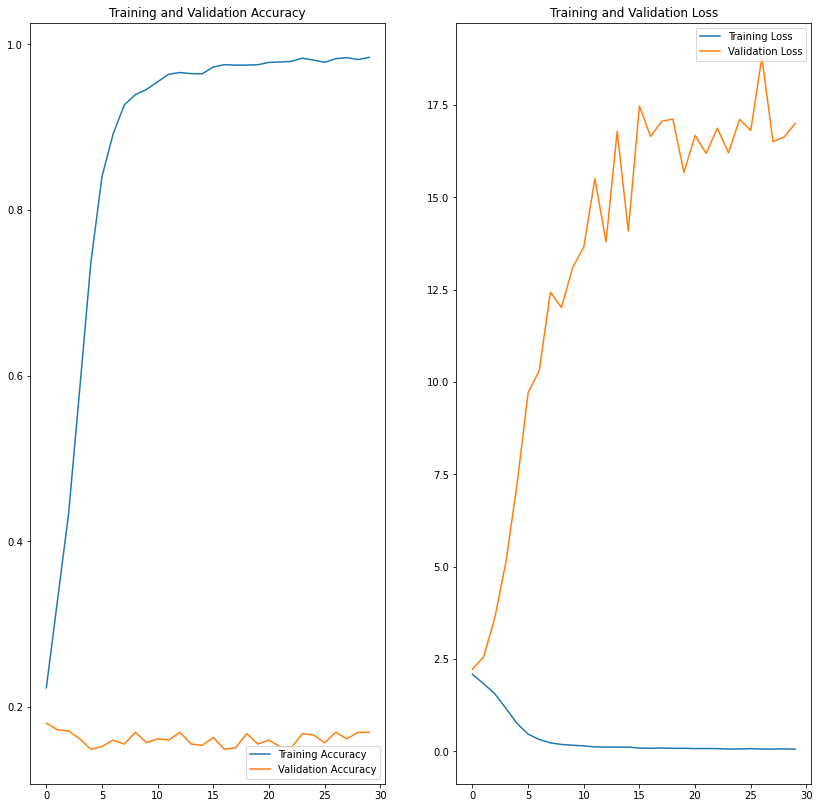

In [41]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

pillow_results['dropout02_relu_2hidden']={'acc':acc,'val_acc':val_acc,'loss':loss,'val_loss':val_loss,'epochs':epochs_range}

plt.figure(figsize=(14, 14))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [42]:
## with shuffle True
startTime =time.time()
epochs=15
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  shuffle=True
)
endTime =time.time()
execTime = endTime-startTime
print(f"execution time:{execTime}s")

Epoch 1/15
558/558 [==============================] - 35s 62ms/step - loss: 0.0393 - accuracy: 0.9874 - val_loss: 17.5661 - val_accuracy: 0.1520
Epoch 2/15
558/558 [==============================] - 35s 62ms/step - loss: 0.0398 - accuracy: 0.9866 - val_loss: 18.6852 - val_accuracy: 0.1505
Epoch 3/15
558/558 [==============================] - 35s 62ms/step - loss: 0.0475 - accuracy: 0.9859 - val_loss: 17.5543 - val_accuracy: 0.1599
Epoch 4/15
558/558 [==============================] - 34s 62ms/step - loss: 0.0503 - accuracy: 0.9847 - val_loss: 15.5069 - val_accuracy: 0.1646
Epoch 5/15
558/558 [==============================] - 35s 62ms/step - loss: 0.0457 - accuracy: 0.9856 - val_loss: 17.0079 - val_accuracy: 0.1583
Epoch 6/15
558/558 [==============================] - 35s 62ms/step - loss: 0.0520 - accuracy: 0.9835 - val_loss: 17.1876 - val_accuracy: 0.1708
Epoch 7/15
558/558 [==============================] - 35s 62ms/step - loss: 0.0382 - accuracy: 0.9883 - val_loss: 17.2922 - val_ac

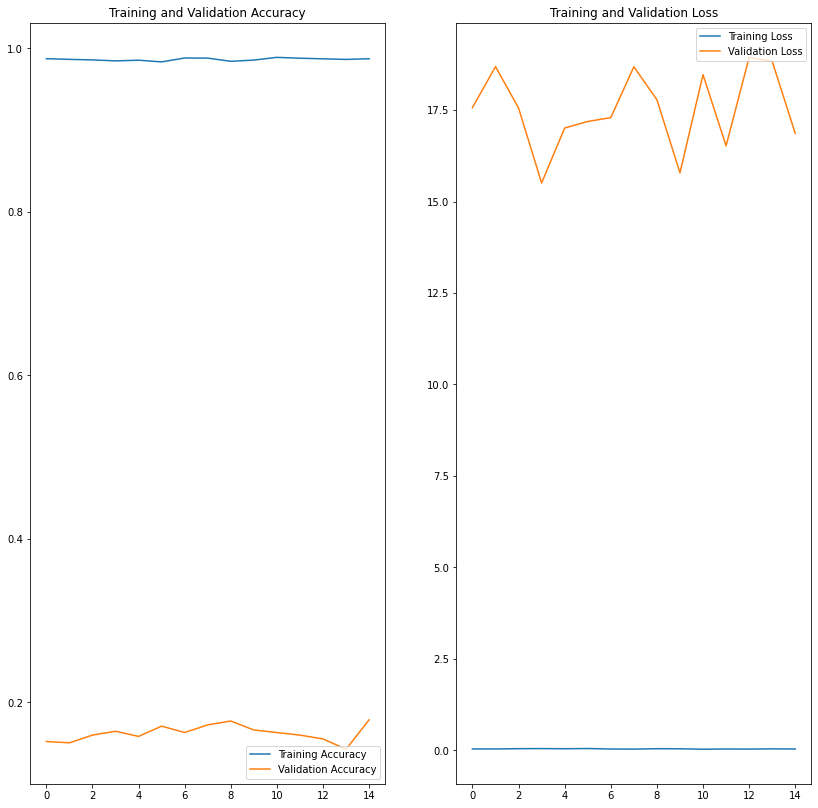

In [43]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

pillow_results['dropout02_relu_2hidden_shuffle']={'acc':acc,'val_acc':val_acc,'loss':loss,'val_loss':val_loss,'epochs':epochs_range}

plt.figure(figsize=(14, 14))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


## Models 5: 5 convulotional layers

In [44]:
#https://hljames.github.io/dog-breed-classification/   Convolutional Neural Network: From Scratch
num_classes = len(class_names)

model = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255, input_shape=(minHeight, minWidth, 1)),
    tf.keras.layers.Conv2D(8, 5, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(128, 3, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(256, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)), 
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    #tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

In [45]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [46]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_6 (Rescaling)     (None, 259, 288, 1)       0         
                                                                 
 conv2d_15 (Conv2D)          (None, 259, 288, 8)       208       
                                                                 
 conv2d_16 (Conv2D)          (None, 259, 288, 16)      1168      
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 129, 144, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 129, 144, 32)      4640      
                                                                 
 conv2d_18 (Conv2D)          (None, 129, 144, 64)      18496     
                                                      

In [47]:
startTime =time.time()
epochs=15
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  shuffle=True
)
endTime =time.time()
execTime = endTime-startTime
print(f"execution time:{execTime}s")

Epoch 1/15
558/558 [==============================] - 62s 105ms/step - loss: 2.1142 - accuracy: 0.2121 - val_loss: 2.2110 - val_accuracy: 0.1991
Epoch 2/15
558/558 [==============================] - 58s 103ms/step - loss: 1.8682 - accuracy: 0.3129 - val_loss: 2.3920 - val_accuracy: 0.1991
Epoch 3/15
558/558 [==============================] - 57s 102ms/step - loss: 1.5936 - accuracy: 0.4272 - val_loss: 2.6178 - val_accuracy: 0.2116
Epoch 4/15
558/558 [==============================] - 58s 103ms/step - loss: 1.2428 - accuracy: 0.5670 - val_loss: 3.5352 - val_accuracy: 0.2038
Epoch 5/15
558/558 [==============================] - 58s 103ms/step - loss: 0.8574 - accuracy: 0.7052 - val_loss: 4.6850 - val_accuracy: 0.2069
Epoch 6/15
558/558 [==============================] - 58s 103ms/step - loss: 0.5708 - accuracy: 0.8028 - val_loss: 5.8326 - val_accuracy: 0.1912
Epoch 7/15
558/558 [==============================] - 57s 103ms/step - loss: 0.4038 - accuracy: 0.8577 - val_loss: 6.5028 - val_ac

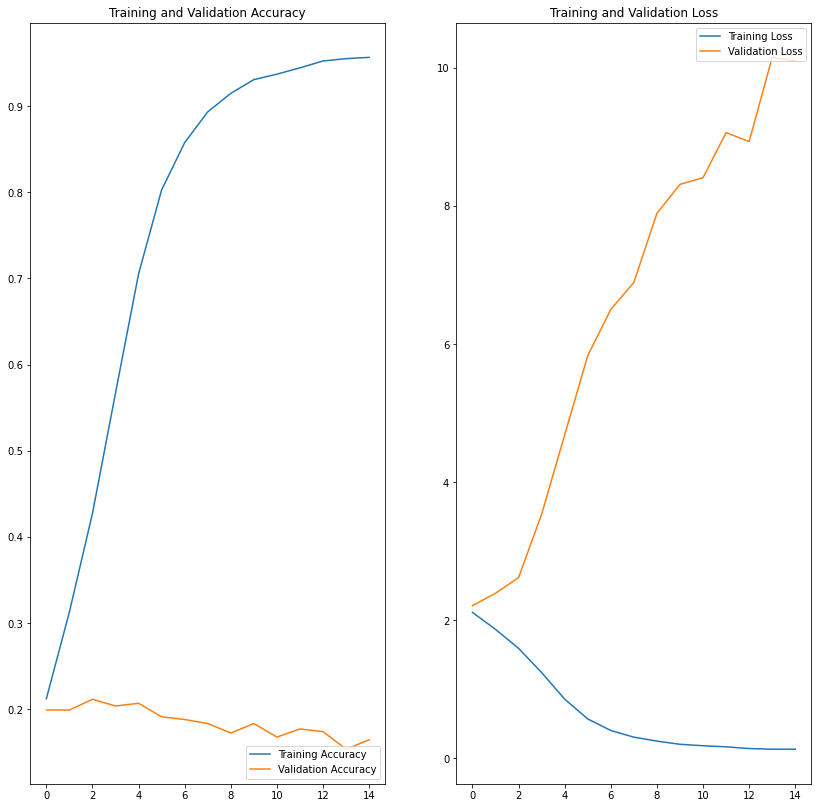

In [48]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

pillow_results['net_model']={'acc':acc,'val_acc':val_acc,'loss':loss,'val_loss':val_loss,'epochs':epochs_range}

plt.figure(figsize=(14, 14))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


## Models 5: 5 convulotional layers + 1 hidden layer

In [49]:
num_classes = len(class_names)

model = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255, input_shape=(minHeight, minWidth, 1)),
    tf.keras.layers.Conv2D(8, 5, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(128, 3, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(256, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)), 
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

In [50]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [51]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_7 (Rescaling)     (None, 259, 288, 1)       0         
                                                                 
 conv2d_21 (Conv2D)          (None, 259, 288, 8)       208       
                                                                 
 conv2d_22 (Conv2D)          (None, 259, 288, 16)      1168      
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 129, 144, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_23 (Conv2D)          (None, 129, 144, 32)      4640      
                                                                 
 conv2d_24 (Conv2D)          (None, 129, 144, 64)      18496     
                                                      

In [52]:
startTime =time.time()
epochs=15
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  shuffle=True
)
endTime =time.time()
execTime = endTime-startTime
print(f"execution time:{execTime}s")

Epoch 1/15
558/558 [==============================] - 61s 105ms/step - loss: 2.0918 - accuracy: 0.2139 - val_loss: 2.5602 - val_accuracy: 0.1755
Epoch 2/15
558/558 [==============================] - 59s 106ms/step - loss: 1.9331 - accuracy: 0.2847 - val_loss: 2.4014 - val_accuracy: 0.1661
Epoch 3/15
558/558 [==============================] - 59s 106ms/step - loss: 1.8097 - accuracy: 0.3347 - val_loss: 2.3278 - val_accuracy: 0.2382
Epoch 4/15
558/558 [==============================] - 59s 106ms/step - loss: 1.6413 - accuracy: 0.3978 - val_loss: 2.9954 - val_accuracy: 0.2116
Epoch 5/15
558/558 [==============================] - 59s 105ms/step - loss: 1.4503 - accuracy: 0.4790 - val_loss: 4.0080 - val_accuracy: 0.2006
Epoch 6/15
558/558 [==============================] - 59s 105ms/step - loss: 1.2539 - accuracy: 0.5515 - val_loss: 3.9669 - val_accuracy: 0.1959
Epoch 7/15
558/558 [==============================] - 59s 105ms/step - loss: 1.0501 - accuracy: 0.6269 - val_loss: 4.5452 - val_ac

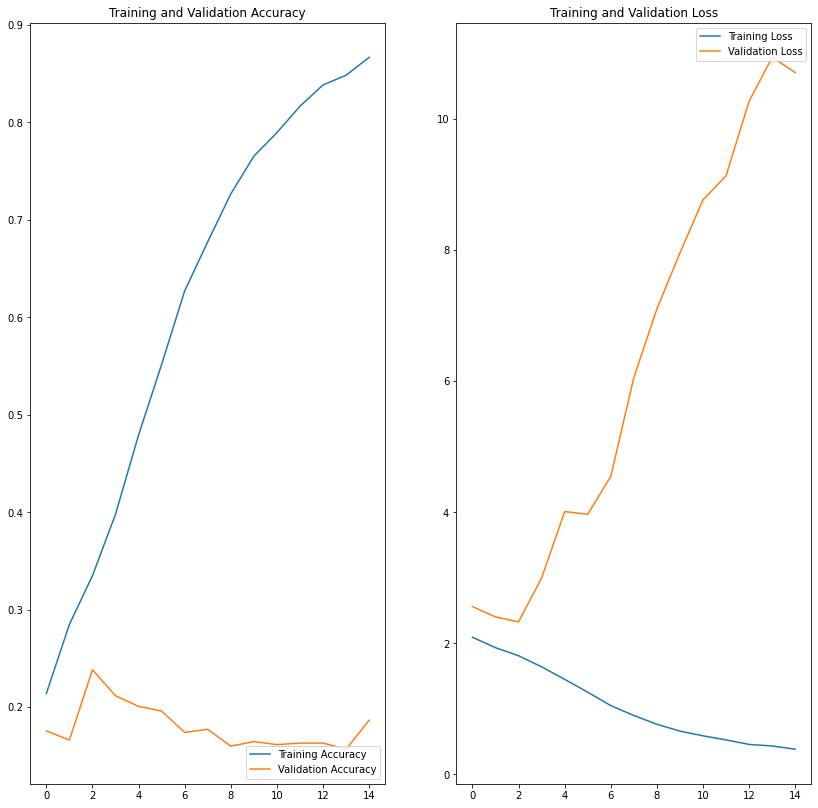

In [53]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

pillow_results['net_model_1hidden']={'acc':acc,'val_acc':val_acc,'loss':loss,'val_loss':val_loss,'epochs':epochs_range}

plt.figure(figsize=(14, 14))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


The different models with pillow preprocessing are not good we will try keras preprocessing instead.

#  Keras preprocessing instead of Pillow

### Make directories

In [10]:
pathImages = path + 'ImagesSelection/'

the original images of 10 breeds from Stanford dogs.

In [11]:
breeds = os.listdir(pathImages)
for i in breeds:
    print(i)

n02112018-Pomeranian
n02090721-Irish_wolfhound
n02111500-Great_Pyrenees
n02088094-Afghan_hound
n02107683-Bernese_mountain_dog
n02085936-Maltese_dog
n02111129-Leonberg
n02092002-Scottish_deerhound
n02111889-Samoyed
n02086240-Shih-Tzu


we will create a test and train set of the original images.

In [12]:
kerasImages = path +'kerasImages/'
trainDir = kerasImages + 'train/'
valDir = kerasImages + 'val/'
testDir = kerasImages + 'test/'

In [13]:
os.makedirs(kerasImages)
os.makedirs(trainDir)
os.makedirs(testDir)
os.makedirs(valDir)

In [14]:
test_split = 0.1
val_split = 0.3 # 0.1 +0.2
for i in breeds:
    os.makedirs(os.path.join(trainDir,i)) # create breed_i train
    os.makedirs(os.path.join(valDir,i))   # create breed_i validation
    os.makedirs(os.path.join(testDir,i))  # create breed_i test
    breedPath = os.path.join(pathImages,i)
    Imgs = os.listdir(breedPath)
    j = 0
    for k,img in enumerate(Imgs):
        if j <= int(len(Imgs)*test_split):
            temp_path = os.path.join(breedPath,img)
            shutil.copy(temp_path,os.path.join(testDir,i))
        elif j > int(len(Imgs)*test_split) and  j <= int(len(Imgs)*val_split):
            temp_path = os.path.join(breedPath,img)
            shutil.copy(temp_path,os.path.join(valDir,i))
        else:
            temp_path = os.path.join(breedPath, img)
            shutil.copy(temp_path,os.path.join(trainDir,i))
        j+=1

In [15]:
batch_size = 32
minHeight = 259
minWidth = 288

### Make datasets

In [16]:
train_ds =tf.keras.utils.image_dataset_from_directory(
    trainDir,
    
    color_mode='rgb',
    batch_size=batch_size,
    image_size=(minHeight, minWidth),
    shuffle=True,
    labels="inferred",
    label_mode='int',
    seed=133,
    validation_split=None,
    #subset="training",
    interpolation='bicubic', #'bilinear', bicubic same thing as pillow
    follow_links=False, # follow symlink
    crop_to_aspect_ratio=False,
    
    
)

Found 1558 files belonging to 10 classes.


In [17]:
val_ds =tf.keras.utils.image_dataset_from_directory(
    valDir ,
    
    color_mode='rgb',
    batch_size=batch_size,
    image_size=(minHeight, minWidth),
    shuffle=False,
    labels="inferred",
    label_mode='int',
    seed=133,
    validation_split=None,
    #subset="validation",
    interpolation= 'bicubic', #'bilinear', bicubic same thing as pillow
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 447 files belonging to 10 classes.


In [18]:
test_ds =tf.keras.utils.image_dataset_from_directory(
    testDir ,
    
    color_mode='rgb',
    batch_size=batch_size,
    image_size=(minHeight, minWidth),
    shuffle=False,
    labels="inferred",
    label_mode='int',
    seed=133,
    validation_split=None,
    #subset="validation",
    interpolation= 'bicubic', #'bilinear', bicubic same thing as pillow
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 228 files belonging to 10 classes.


In [19]:
class_names = train_ds.class_names
print(class_names)
num_classes = len(class_names)

['n02085936-Maltese_dog', 'n02086240-Shih-Tzu', 'n02088094-Afghan_hound', 'n02090721-Irish_wolfhound', 'n02092002-Scottish_deerhound', 'n02107683-Bernese_mountain_dog', 'n02111129-Leonberg', 'n02111500-Great_Pyrenees', 'n02111889-Samoyed', 'n02112018-Pomeranian']


## Basic Model 

In [20]:
resize_and_rescale = tf.keras.Sequential([
  tf.keras.layers.Resizing(minHeight,minWidth),
  tf.keras.layers.Rescaling(1./127.5, offset=-1,input_shape=(minHeight, minWidth, 3))
])


In [21]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.RandomFlip("horizontal_and_vertical"),
  tf.keras.layers.RandomRotation(0.2),
  tf.keras.layers.RandomZoom(0.2),
    
])


In [22]:
# https://stackoverflow.com/questions/73770146/warningtensorflowusing-a-while-loop-for-converting-cause-there-is-no-registere
class Rescaling(tf.keras.layers.Layer):
    """Multiply inputs by `scale` and adds `offset`.
    For instance:
    1. To rescale an input in the `[0, 255]` range
    to be in the `[0, 1]` range, you would pass `scale=1./255`.
    2. To rescale an input in the `[0, 255]` range to be in the `[-1, 1]` 
    range,
    you would pass `scale=1./127.5, offset=-1`.
    The rescaling is applied both during training and inference.
    Input shape:
    Arbitrary.
    Output shape:
    Same as input.
    Arguments:
    scale: Float, the scale to apply to the inputs.
    offset: Float, the offset to apply to the inputs.
    name: A string, the name of the layer.
    """

    def __init__(self, scale, offset=0., name=None, **kwargs):
      self.scale = scale
      self.offset = offset
      super(Rescaling, self).__init__(name=name, **kwargs)

    def call(self, inputs):
      dtype = self._compute_dtype
      scale = tf.cast(self.scale, dtype)
      offset = tf.cast(self.offset, dtype)
      return tf.cast(inputs, dtype) * scale + offset

    def compute_output_shape(self, input_shape):
      return input_shape

    def get_config(self):
      config = {
          'scale': self.scale,
          'offset': self.offset,
      }
      base_config = super(Rescaling, self).get_config()
      return dict(list(base_config.items()) + list(config.items()))

In [23]:
model = tf.keras.Sequential([
  resize_and_rescale,
  data_augmentation,
  tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(num_classes, activation='softmax')
])


In [24]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [25]:
startTime =time.time()
epochs=40
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)
endTime =time.time()
execTime = endTime-startTime
print(f"execution time:{execTime}s")

Epoch 1/40


/home/thomas/.bin/miniconda3/envs/tf/lib/python3.9/site-packages/keras/backend.py:5585: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


49/49 [==============================] - 33s 183ms/step - loss: 2.5262 - accuracy: 0.1098 - val_loss: 2.2669 - val_accuracy: 0.1566
Epoch 2/40
49/49 [==============================] - 7s 130ms/step - loss: 2.2177 - accuracy: 0.1958 - val_loss: 2.1694 - val_accuracy: 0.2282
Epoch 3/40
49/49 [==============================] - 6s 123ms/step - loss: 2.1212 - accuracy: 0.2439 - val_loss: 2.0522 - val_accuracy: 0.2819
Epoch 4/40
49/49 [==============================] - 6s 127ms/step - loss: 2.0185 - accuracy: 0.2760 - val_loss: 1.9286 - val_accuracy: 0.2841
Epoch 5/40
49/49 [==============================] - 6s 129ms/step - loss: 1.9223 - accuracy: 0.2933 - val_loss: 1.8647 - val_accuracy: 0.3266
Epoch 6/40
49/49 [==============================] - 7s 131ms/step - loss: 1.8399 - accuracy: 0.3344 - val_loss: 1.9498 - val_accuracy: 0.3154
Epoch 7/40
49/49 [==============================] - 7s 133ms/step - loss: 1.8017 - accuracy: 0.3472 - val_loss: 1.8698 - val_accuracy: 0.3289
Epoch 8/40
49/49

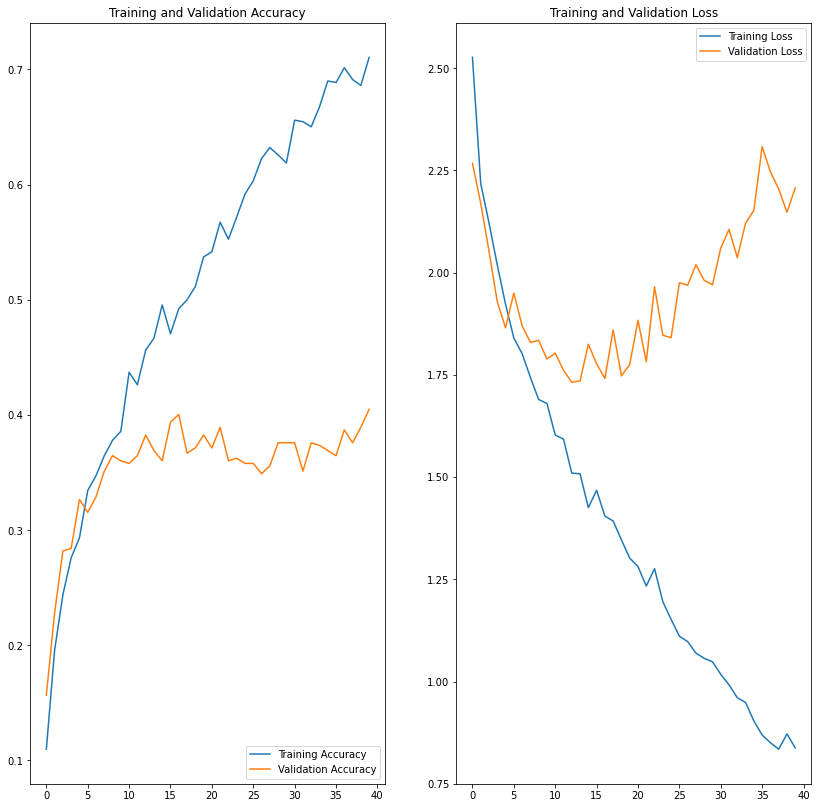

In [26]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

keras_results = {'basic':{'acc':acc,'val_acc':val_acc,'loss':loss,'val_loss':val_loss,'epochs':epochs_range}}

plt.figure(figsize=(14, 14))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


##  dropout

In [27]:
model = tf.keras.Sequential([
  resize_and_rescale,
  data_augmentation,
  tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(num_classes, activation='softmax')
])


In [28]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [29]:
startTime =time.time()
epochs=40
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)
endTime =time.time()
execTime = endTime-startTime
print(f"execution time:{execTime}s")

Epoch 1/40
49/49 [==============================] - 12s 142ms/step - loss: 2.3993 - accuracy: 0.1155 - val_loss: 2.2293 - val_accuracy: 0.1320
Epoch 2/40
49/49 [==============================] - 7s 138ms/step - loss: 2.1813 - accuracy: 0.1861 - val_loss: 2.1102 - val_accuracy: 0.2483
Epoch 3/40
49/49 [==============================] - 7s 137ms/step - loss: 2.0559 - accuracy: 0.2413 - val_loss: 1.9872 - val_accuracy: 0.2975
Epoch 4/40
49/49 [==============================] - 7s 137ms/step - loss: 1.9217 - accuracy: 0.2863 - val_loss: 1.8983 - val_accuracy: 0.3154
Epoch 5/40
49/49 [==============================] - 7s 137ms/step - loss: 1.8426 - accuracy: 0.3100 - val_loss: 1.9267 - val_accuracy: 0.2975
Epoch 6/40
49/49 [==============================] - 7s 137ms/step - loss: 1.7902 - accuracy: 0.3453 - val_loss: 1.8340 - val_accuracy: 0.3132
Epoch 7/40
49/49 [==============================] - 7s 137ms/step - loss: 1.7689 - accuracy: 0.3594 - val_loss: 1.8387 - val_accuracy: 0.3154
Epoch

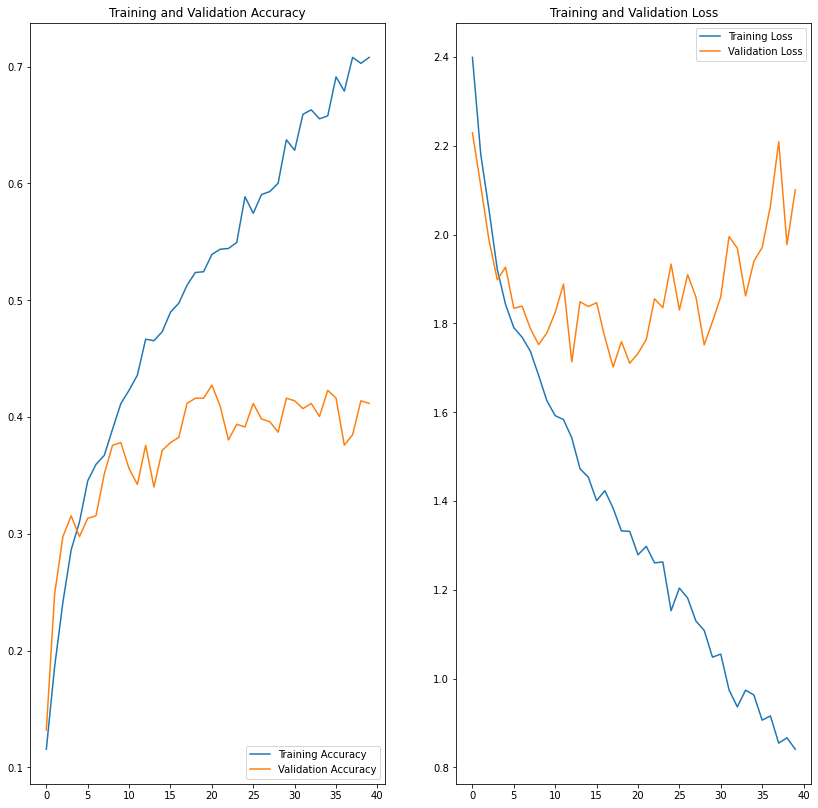

In [30]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

keras_results['dropout']={'acc':acc,'val_acc':val_acc,'loss':loss,'val_loss':val_loss,'epochs':epochs_range}

plt.figure(figsize=(14, 14))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## hidden layer

In [31]:
model = tf.keras.Sequential([
  resize_and_rescale,
  data_augmentation,
  tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(num_classes, activation='softmax')
])


In [32]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [33]:
startTime =time.time()
epochs=40
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)
endTime =time.time()
execTime = endTime-startTime
print(f"execution time:{execTime}s")

Epoch 1/40
49/49 [==============================] - 12s 130ms/step - loss: 2.3873 - accuracy: 0.1399 - val_loss: 2.2380 - val_accuracy: 0.1432
Epoch 2/40
49/49 [==============================] - 6s 126ms/step - loss: 2.1348 - accuracy: 0.1887 - val_loss: 2.0319 - val_accuracy: 0.2707
Epoch 3/40
49/49 [==============================] - 6s 126ms/step - loss: 1.9724 - accuracy: 0.2664 - val_loss: 1.9427 - val_accuracy: 0.3154
Epoch 4/40
49/49 [==============================] - 6s 125ms/step - loss: 1.8718 - accuracy: 0.3107 - val_loss: 1.8588 - val_accuracy: 0.3177
Epoch 5/40
49/49 [==============================] - 6s 125ms/step - loss: 1.8130 - accuracy: 0.3261 - val_loss: 1.8435 - val_accuracy: 0.3199
Epoch 6/40
49/49 [==============================] - 6s 126ms/step - loss: 1.7425 - accuracy: 0.3434 - val_loss: 1.8052 - val_accuracy: 0.3289
Epoch 7/40
49/49 [==============================] - 6s 127ms/step - loss: 1.6945 - accuracy: 0.3703 - val_loss: 1.8959 - val_accuracy: 0.3221
Epoch

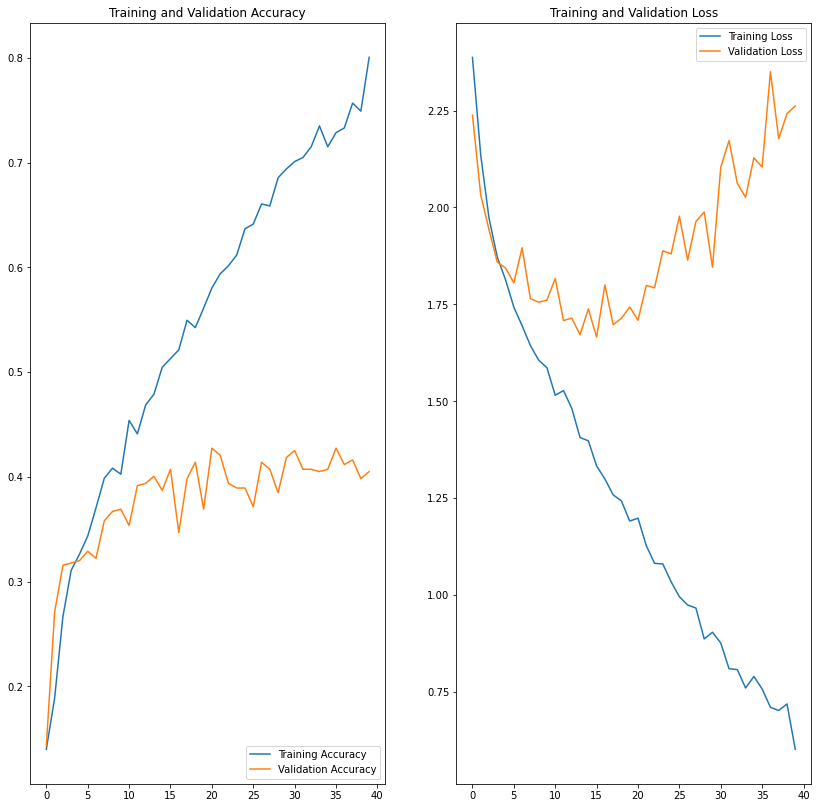

In [34]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

keras_results['hidden']={'acc':acc,'val_acc':val_acc,'loss':loss,'val_loss':val_loss,'epochs':epochs_range}

plt.figure(figsize=(14, 14))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## hidden layers + dropout

In [35]:
model = tf.keras.Sequential([
  resize_and_rescale,
  data_augmentation,
  tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(num_classes, activation='softmax')
])


In [36]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [37]:
startTime =time.time()
epochs=40
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)
endTime =time.time()
execTime = endTime-startTime
print(f"execution time:{execTime}s")

Epoch 1/40
49/49 [==============================] - 12s 142ms/step - loss: 2.4207 - accuracy: 0.1335 - val_loss: 2.1511 - val_accuracy: 0.1991
Epoch 2/40
49/49 [==============================] - 7s 137ms/step - loss: 2.0980 - accuracy: 0.2285 - val_loss: 2.0020 - val_accuracy: 0.2931
Epoch 3/40
49/49 [==============================] - 7s 137ms/step - loss: 1.9467 - accuracy: 0.2875 - val_loss: 1.9003 - val_accuracy: 0.3647
Epoch 4/40
49/49 [==============================] - 7s 138ms/step - loss: 1.8608 - accuracy: 0.3145 - val_loss: 1.8427 - val_accuracy: 0.3468
Epoch 5/40
49/49 [==============================] - 7s 138ms/step - loss: 1.8127 - accuracy: 0.3402 - val_loss: 1.8647 - val_accuracy: 0.3468
Epoch 6/40
49/49 [==============================] - 7s 138ms/step - loss: 1.7780 - accuracy: 0.3626 - val_loss: 1.8424 - val_accuracy: 0.3669
Epoch 7/40
49/49 [==============================] - 7s 138ms/step - loss: 1.7130 - accuracy: 0.3556 - val_loss: 1.9046 - val_accuracy: 0.3669
Epoch

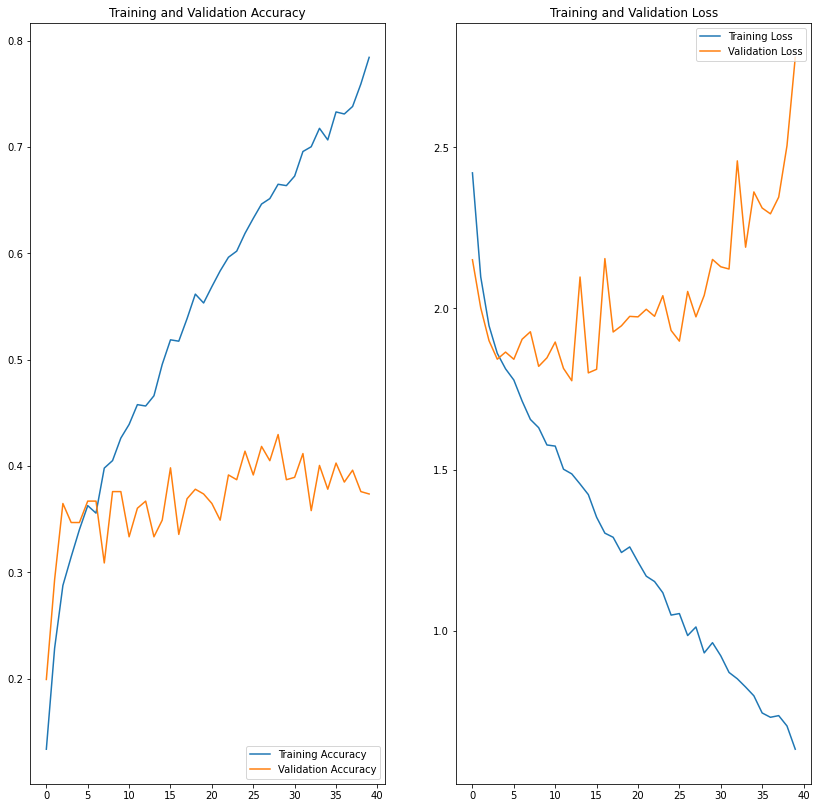

In [38]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

keras_results['dropout_hidden']={'acc':acc,'val_acc':val_acc,'loss':loss,'val_loss':val_loss,'epochs':epochs_range}

plt.figure(figsize=(14, 14))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## net model

In [39]:
#https://hljames.github.io/dog-breed-classification/   Convolutional Neural Network: From Scratch


model = tf.keras.Sequential([
    resize_and_rescale,
    data_augmentation,
    tf.keras.layers.Conv2D(8, 5, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(128, 3, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(256, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)), 
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

In [40]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [41]:
startTime =time.time()
epochs=40
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)
endTime =time.time()
execTime = endTime-startTime
print(f"execution time:{execTime}s")

Epoch 1/40
49/49 [==============================] - 19s 243ms/step - loss: 2.3108 - accuracy: 0.1194 - val_loss: 2.2827 - val_accuracy: 0.1163
Epoch 2/40
49/49 [==============================] - 10s 205ms/step - loss: 2.2336 - accuracy: 0.1496 - val_loss: 2.2350 - val_accuracy: 0.1275
Epoch 3/40
49/49 [==============================] - 10s 205ms/step - loss: 2.1203 - accuracy: 0.1945 - val_loss: 2.1460 - val_accuracy: 0.1723
Epoch 4/40
49/49 [==============================] - 10s 206ms/step - loss: 2.0888 - accuracy: 0.1977 - val_loss: 2.1554 - val_accuracy: 0.1723
Epoch 5/40
49/49 [==============================] - 10s 205ms/step - loss: 2.0316 - accuracy: 0.2279 - val_loss: 2.0616 - val_accuracy: 0.2036
Epoch 6/40
49/49 [==============================] - 10s 206ms/step - loss: 1.9697 - accuracy: 0.2786 - val_loss: 2.1526 - val_accuracy: 0.2260
Epoch 7/40
49/49 [==============================] - 10s 205ms/step - loss: 1.9349 - accuracy: 0.2831 - val_loss: 2.0638 - val_accuracy: 0.2304

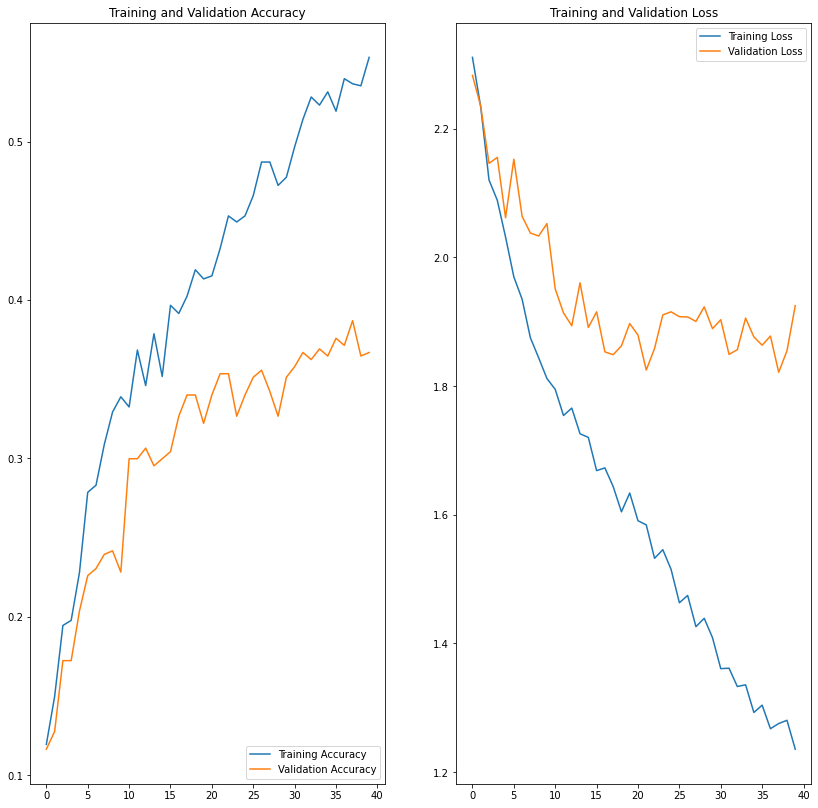

In [42]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

keras_results['net_model']={'acc':acc,'val_acc':val_acc,'loss':loss,'val_loss':val_loss,'epochs':epochs_range}

plt.figure(figsize=(14, 14))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

 ### net model without one hidden layer

In [43]:
#https://hljames.github.io/dog-breed-classification/  Convolutional Neural Network: From Scratch


model = tf.keras.Sequential([
    resize_and_rescale,
    data_augmentation,
    tf.keras.layers.Conv2D(8, 5, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(128, 3, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(256, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)), 
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

In [44]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [45]:
startTime =time.time()
epochs=40
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)
endTime =time.time()
execTime = endTime-startTime
print(f"execution time:{execTime}s")

Epoch 1/40
49/49 [==============================] - 16s 209ms/step - loss: 2.3082 - accuracy: 0.1354 - val_loss: 2.2832 - val_accuracy: 0.1230
Epoch 2/40
49/49 [==============================] - 10s 206ms/step - loss: 2.1219 - accuracy: 0.2099 - val_loss: 2.1708 - val_accuracy: 0.2081
Epoch 3/40
49/49 [==============================] - 10s 205ms/step - loss: 2.0979 - accuracy: 0.2189 - val_loss: 2.1834 - val_accuracy: 0.1924
Epoch 4/40
49/49 [==============================] - 10s 206ms/step - loss: 2.0104 - accuracy: 0.2721 - val_loss: 2.1491 - val_accuracy: 0.1790
Epoch 5/40
49/49 [==============================] - 10s 206ms/step - loss: 2.0212 - accuracy: 0.2311 - val_loss: 2.1124 - val_accuracy: 0.1991
Epoch 6/40
49/49 [==============================] - 10s 205ms/step - loss: 1.9542 - accuracy: 0.2754 - val_loss: 2.1131 - val_accuracy: 0.1633
Epoch 7/40
49/49 [==============================] - 10s 206ms/step - loss: 1.9106 - accuracy: 0.2908 - val_loss: 2.1186 - val_accuracy: 0.2192

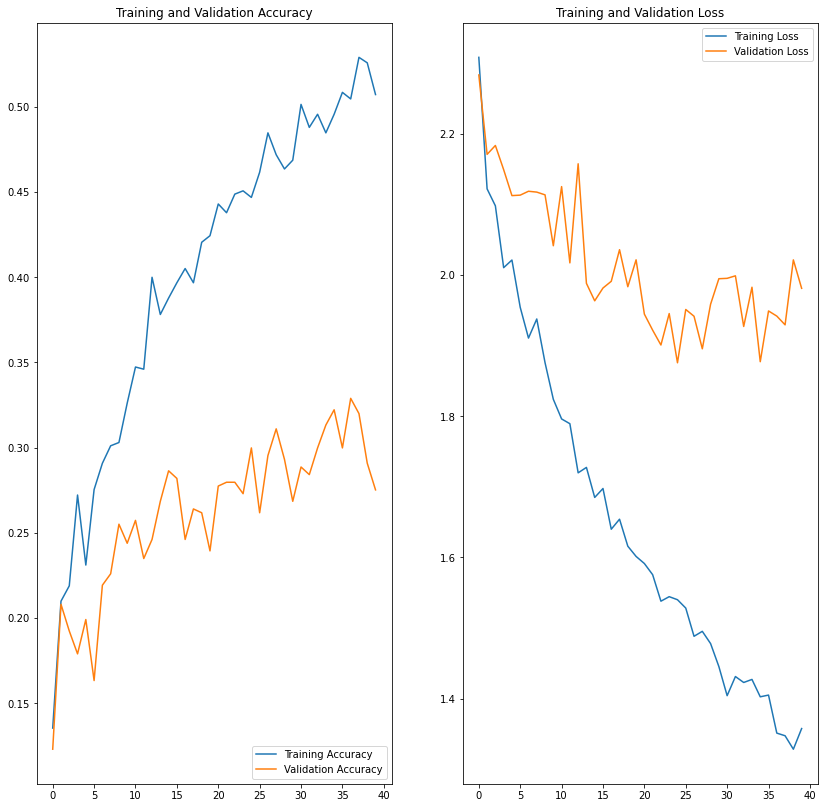

In [46]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

keras_results['net_model_without_hidden']={'acc':acc,'val_acc':val_acc,'loss':loss,'val_loss':val_loss,'epochs':epochs_range}

plt.figure(figsize=(14, 14))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### net model plus one convolution layer

In [47]:
#https://hljames.github.io/dog-breed-classification/   Convolutional Neural Network: From Scratch


model = tf.keras.Sequential([
    resize_and_rescale,
    data_augmentation,
    tf.keras.layers.Conv2D(8, 5, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(128, 3, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(256, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)), 
    tf.keras.layers.Conv2D(512, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)), 
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

In [48]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [49]:
startTime =time.time()
epochs=40
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)
endTime =time.time()
execTime = endTime-startTime
print(f"execution time:{execTime}s")

Epoch 1/40
49/49 [==============================] - 18s 238ms/step - loss: 2.3851 - accuracy: 0.1085 - val_loss: 2.2952 - val_accuracy: 0.1588
Epoch 2/40
49/49 [==============================] - 11s 220ms/step - loss: 2.2338 - accuracy: 0.1861 - val_loss: 2.1752 - val_accuracy: 0.2058
Epoch 3/40
49/49 [==============================] - 11s 221ms/step - loss: 2.1197 - accuracy: 0.1996 - val_loss: 2.1016 - val_accuracy: 0.2192
Epoch 4/40
49/49 [==============================] - 11s 220ms/step - loss: 2.0759 - accuracy: 0.2067 - val_loss: 2.1440 - val_accuracy: 0.1991
Epoch 5/40
49/49 [==============================] - 11s 219ms/step - loss: 2.0395 - accuracy: 0.2092 - val_loss: 2.0481 - val_accuracy: 0.2125
Epoch 6/40
49/49 [==============================] - 11s 219ms/step - loss: 2.0082 - accuracy: 0.2317 - val_loss: 1.9903 - val_accuracy: 0.2327
Epoch 7/40
49/49 [==============================] - 11s 219ms/step - loss: 1.9480 - accuracy: 0.2773 - val_loss: 1.9358 - val_accuracy: 0.2595

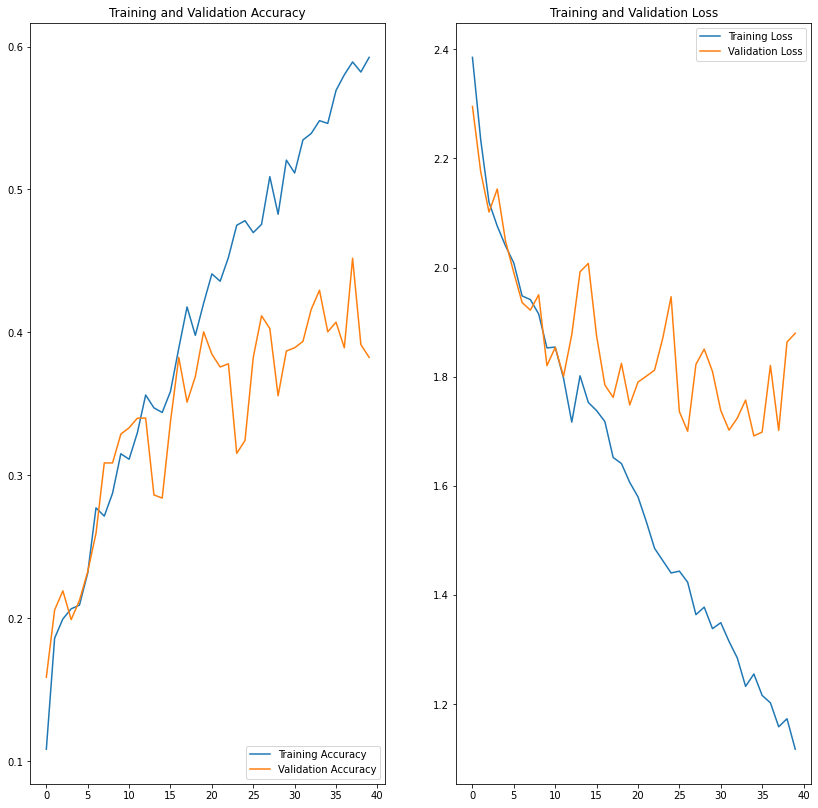

In [50]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

keras_results['net_model_with_1conv2D']={'acc':acc,'val_acc':val_acc,'loss':loss,'val_loss':val_loss,'epochs':epochs_range}

plt.figure(figsize=(14, 14))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### net model plus one convolution layer without hidden layer

In [51]:
#https://hljames.github.io/dog-breed-classification/   Convolutional Neural Network: From Scratch


model = tf.keras.Sequential([
    resize_and_rescale,
    data_augmentation,
    tf.keras.layers.Conv2D(8, 5, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(128, 3, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(256, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)), 
    tf.keras.layers.Conv2D(512, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

In [52]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [53]:
startTime =time.time()
epochs=40
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)
endTime =time.time()
execTime = endTime-startTime
print(f"execution time:{execTime}s")

Epoch 1/40
49/49 [==============================] - 17s 224ms/step - loss: 2.3301 - accuracy: 0.1021 - val_loss: 2.3022 - val_accuracy: 0.1119
Epoch 2/40
49/49 [==============================] - 11s 218ms/step - loss: 2.2934 - accuracy: 0.1322 - val_loss: 2.2331 - val_accuracy: 0.2081
Epoch 3/40
49/49 [==============================] - 11s 220ms/step - loss: 2.1829 - accuracy: 0.1951 - val_loss: 2.2450 - val_accuracy: 0.1969
Epoch 4/40
49/49 [==============================] - 11s 218ms/step - loss: 2.0977 - accuracy: 0.2150 - val_loss: 2.0700 - val_accuracy: 0.2506
Epoch 5/40
49/49 [==============================] - 11s 219ms/step - loss: 2.0148 - accuracy: 0.2503 - val_loss: 1.9971 - val_accuracy: 0.2864
Epoch 6/40
49/49 [==============================] - 11s 219ms/step - loss: 1.9789 - accuracy: 0.2728 - val_loss: 2.0057 - val_accuracy: 0.2998
Epoch 7/40
49/49 [==============================] - 11s 219ms/step - loss: 1.9194 - accuracy: 0.3004 - val_loss: 2.0477 - val_accuracy: 0.2662

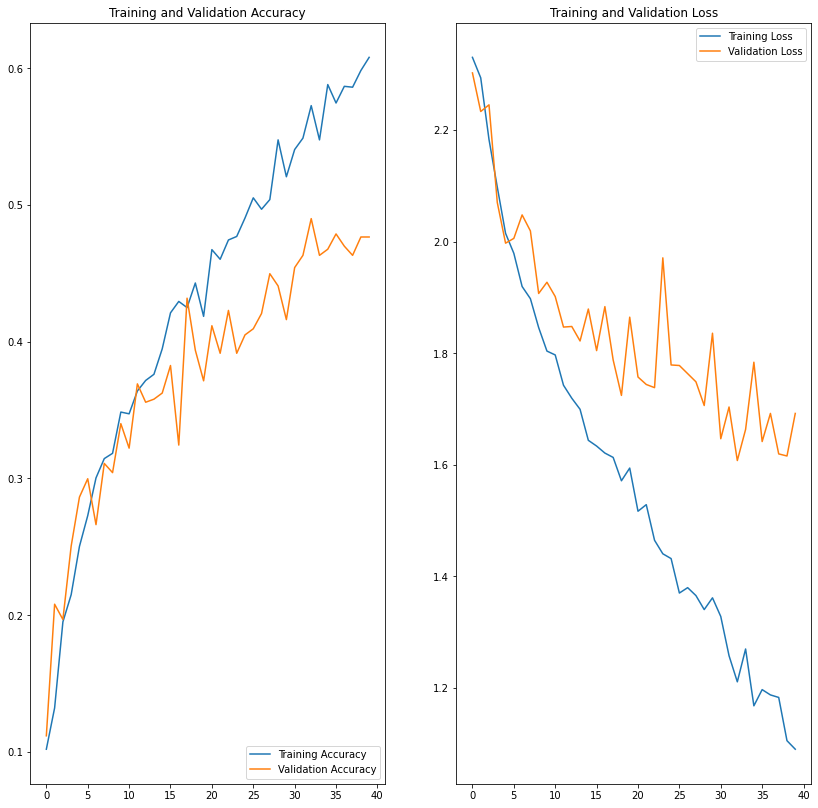

In [54]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

keras_results['net_model_with_1conv2D_without_hidden_layer']={'acc':acc,'val_acc':val_acc,'loss':loss,'val_loss':val_loss,'epochs':epochs_range}

plt.figure(figsize=(14, 14))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### net model plus one convolution layer with 2 hidden layer

In [55]:
#https://hljames.github.io/dog-breed-classification/   Convolutional Neural Network: From Scratch


model = tf.keras.Sequential([
    resize_and_rescale,
    data_augmentation,
    tf.keras.layers.Conv2D(8, 5, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(128, 3, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(256, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)), 
    tf.keras.layers.Conv2D(512, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)), 
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

In [56]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [57]:
startTime =time.time()
epochs=40
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)
endTime =time.time()
execTime = endTime-startTime
print(f"execution time:{execTime}s")

Epoch 1/40
49/49 [==============================] - 18s 227ms/step - loss: 2.3142 - accuracy: 0.1123 - val_loss: 2.3907 - val_accuracy: 0.1298
Epoch 2/40
49/49 [==============================] - 11s 222ms/step - loss: 2.1633 - accuracy: 0.1637 - val_loss: 2.1705 - val_accuracy: 0.1700
Epoch 3/40
49/49 [==============================] - 11s 223ms/step - loss: 2.0866 - accuracy: 0.1990 - val_loss: 2.1313 - val_accuracy: 0.1611
Epoch 4/40
49/49 [==============================] - 11s 222ms/step - loss: 2.0465 - accuracy: 0.2182 - val_loss: 2.0992 - val_accuracy: 0.1633
Epoch 5/40
49/49 [==============================] - 11s 222ms/step - loss: 2.0407 - accuracy: 0.2285 - val_loss: 2.1106 - val_accuracy: 0.1857
Epoch 6/40
49/49 [==============================] - 11s 222ms/step - loss: 2.0520 - accuracy: 0.2067 - val_loss: 2.2159 - val_accuracy: 0.1812
Epoch 7/40
49/49 [==============================] - 11s 222ms/step - loss: 2.0200 - accuracy: 0.2407 - val_loss: 2.1015 - val_accuracy: 0.2192

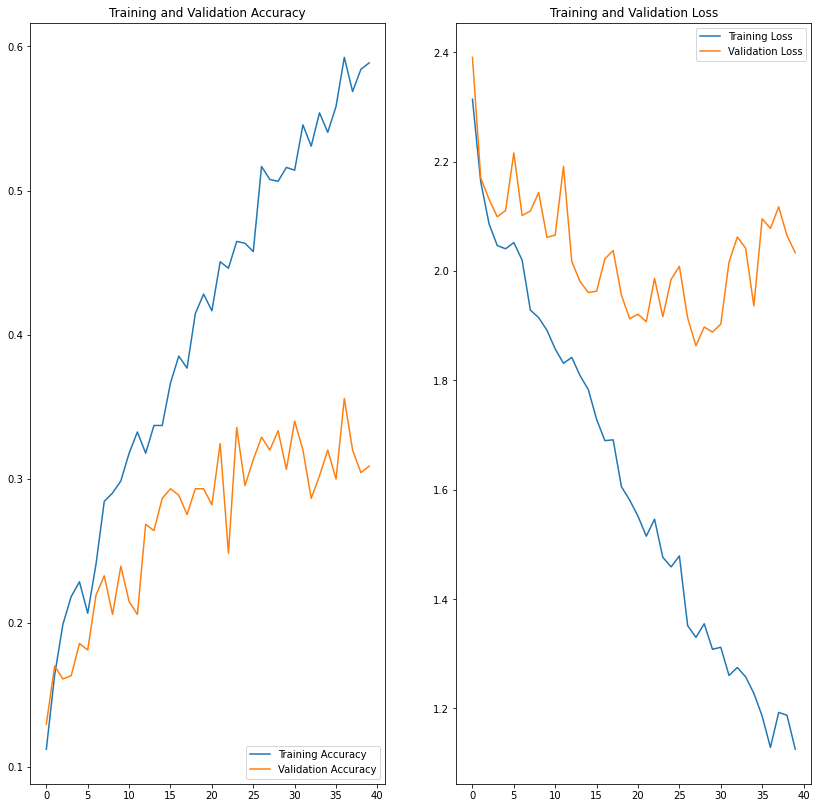

In [58]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

keras_results['net_model_with_1conv2D_with_2hidden_layer']={'acc':acc,'val_acc':val_acc,'loss':loss,'val_loss':val_loss,'epochs':epochs_range}

plt.figure(figsize=(14, 14))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Summary Results

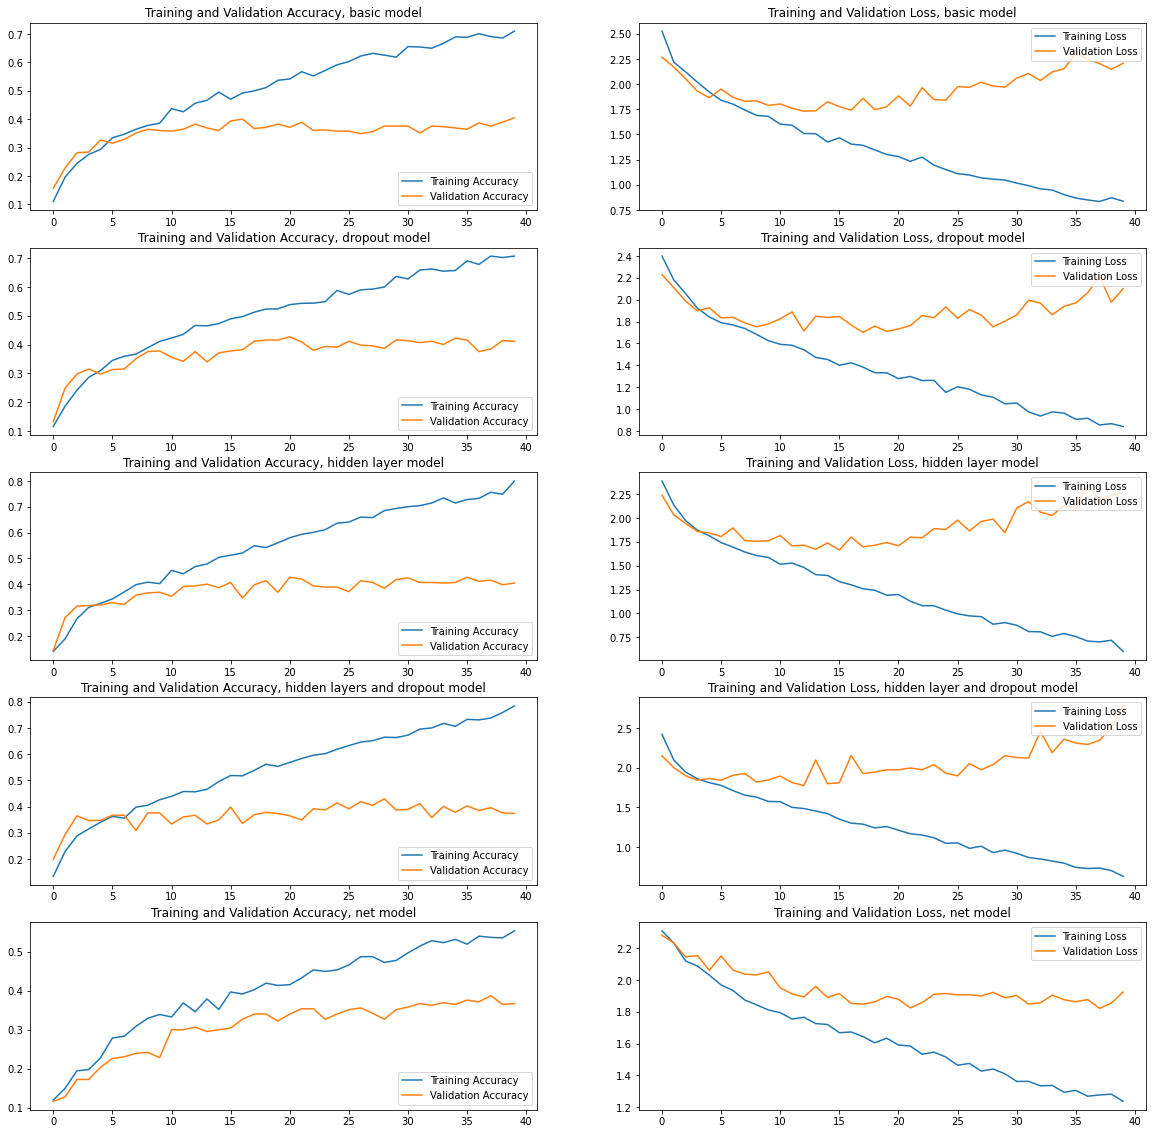

In [59]:
plt.figure(figsize=(20, 20))
epochs_range = keras_results['basic']['epochs']
loss = keras_results['basic']['loss']
val_loss = keras_results['basic']['val_loss']
acc = keras_results['basic']['acc']
val_acc = keras_results['basic']['val_acc']

plt.subplot(5, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy, basic model')

plt.subplot(5, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss, basic model')

epochs_range = keras_results['dropout']['epochs']
loss = keras_results['dropout']['loss']
val_loss = keras_results['dropout']['val_loss']
acc = keras_results['dropout']['acc']
val_acc = keras_results['dropout']['val_acc']


plt.subplot(5, 2, 3)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy, dropout model')

plt.subplot(5, 2, 4)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss, dropout model')

epochs_range = keras_results['hidden']['epochs']
loss = keras_results['hidden']['loss']
val_loss = keras_results['hidden']['val_loss']
acc = keras_results['hidden']['acc']
val_acc = keras_results['hidden']['val_acc']


plt.subplot(5, 2, 5)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy, hidden layer model')

plt.subplot(5, 2, 6)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss, hidden layer model')

epochs_range = keras_results['dropout_hidden']['epochs']
loss = keras_results['dropout_hidden']['loss']
val_loss = keras_results['dropout_hidden']['val_loss']
acc = keras_results['dropout_hidden']['acc']
val_acc = keras_results['dropout_hidden']['val_acc']


plt.subplot(5, 2, 7)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy, hidden layers and dropout model')

plt.subplot(5, 2, 8)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss, hidden layer and dropout model')

epochs_range = keras_results['net_model']['epochs']
loss = keras_results['net_model']['loss']
val_loss = keras_results['net_model']['val_loss']
acc = keras_results['net_model']['acc']
val_acc = keras_results['net_model']['val_acc']

plt.subplot(5, 2, 9)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy, net model')

plt.subplot(5, 2, 10)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss, net model')

plt.show()

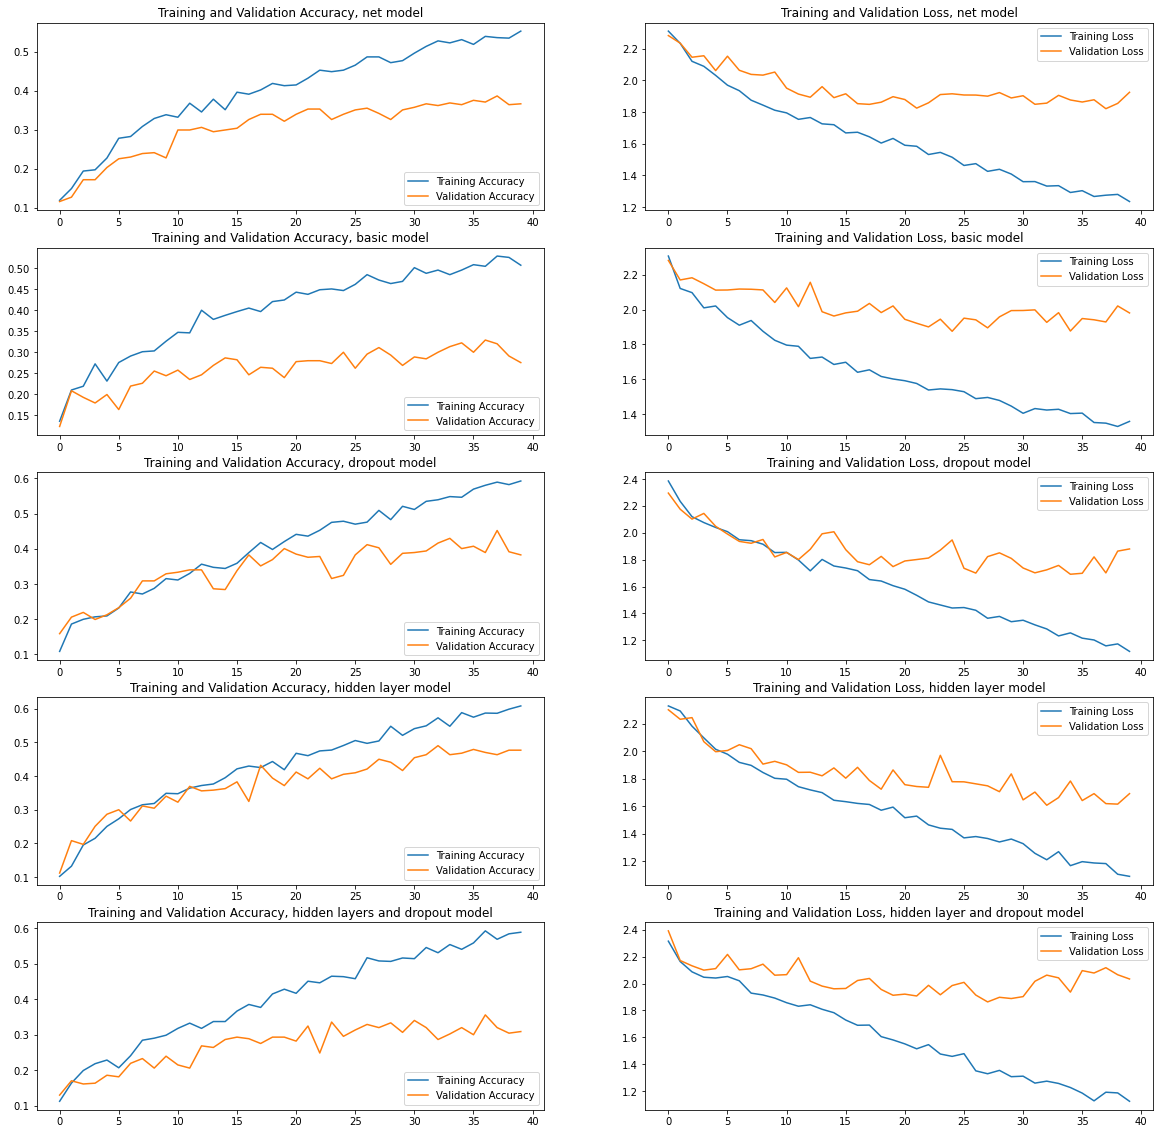

In [60]:
plt.figure(figsize=(20, 20))

epochs_range = keras_results['net_model']['epochs']
loss = keras_results['net_model']['loss']
val_loss = keras_results['net_model']['val_loss']
acc = keras_results['net_model']['acc']
val_acc = keras_results['net_model']['val_acc']

plt.subplot(5, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy, net model')

plt.subplot(5, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss, net model')


epochs_range = keras_results['net_model_without_hidden']['epochs']
loss = keras_results['net_model_without_hidden']['loss']
val_loss = keras_results['net_model_without_hidden']['val_loss']
acc = keras_results['net_model_without_hidden']['acc']
val_acc = keras_results['net_model_without_hidden']['val_acc']

plt.subplot(5, 2, 3)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy, basic model')

plt.subplot(5, 2, 4)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss, basic model')

epochs_range = keras_results['net_model_with_1conv2D']['epochs']
loss = keras_results['net_model_with_1conv2D']['loss']
val_loss = keras_results['net_model_with_1conv2D']['val_loss']
acc = keras_results['net_model_with_1conv2D']['acc']
val_acc = keras_results['net_model_with_1conv2D']['val_acc']


plt.subplot(5, 2, 5)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy, dropout model')

plt.subplot(5, 2, 6)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss, dropout model')

epochs_range = keras_results['net_model_with_1conv2D_without_hidden_layer']['epochs']
loss = keras_results['net_model_with_1conv2D_without_hidden_layer']['loss']
val_loss = keras_results['net_model_with_1conv2D_without_hidden_layer']['val_loss']
acc = keras_results['net_model_with_1conv2D_without_hidden_layer']['acc']
val_acc = keras_results['net_model_with_1conv2D_without_hidden_layer']['val_acc']


plt.subplot(5, 2, 7)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy, hidden layer model')

plt.subplot(5, 2, 8)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss, hidden layer model')

epochs_range = keras_results['net_model_with_1conv2D_with_2hidden_layer']['epochs']
loss = keras_results['net_model_with_1conv2D_with_2hidden_layer']['loss']
val_loss = keras_results['net_model_with_1conv2D_with_2hidden_layer']['val_loss']
acc = keras_results['net_model_with_1conv2D_with_2hidden_layer']['acc']
val_acc = keras_results['net_model_with_1conv2D_with_2hidden_layer']['val_acc']


plt.subplot(5, 2, 9)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy, hidden layers and dropout model')

plt.subplot(5, 2, 10)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss, hidden layer and dropout model')

plt.show()

# Transfer learning

In [61]:
kerasImages = path +'kerasImages/'
trainDir = kerasImages + 'train/'
testDir = kerasImages + 'test/'
valDir = kerasImages + 'val/'

In [62]:
batch_size = 32
minHeight = 160
minWidth = 160
IMG_SIZE = (minHeight, minWidth)

In [63]:
train_ds =tf.keras.utils.image_dataset_from_directory(
    trainDir,
    
    color_mode='rgb',
    batch_size=batch_size,
    image_size=(minHeight, minWidth),
    shuffle=True,
    labels="inferred",
    label_mode='int',
    seed=133,
    validation_split=None,
    #subset="training",
    interpolation='bicubic', #'bilinear', bicubic same thing as pillow
    follow_links=False, # follow symlink
    crop_to_aspect_ratio=False,
    
    
)

Found 1558 files belonging to 10 classes.


In [64]:
val_ds =tf.keras.utils.image_dataset_from_directory(
    valDir ,
    
    color_mode='rgb',
    batch_size=batch_size,
    image_size=(minHeight, minWidth),
    shuffle=False,
    labels="inferred",
    label_mode='int',
    seed=133,
    validation_split=None,
    #subset="validation",
    interpolation= 'bicubic', #'bilinear', bicubic same thing as pillow
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 447 files belonging to 10 classes.


['n02085936-Maltese_dog', 'n02086240-Shih-Tzu', 'n02088094-Afghan_hound', 'n02090721-Irish_wolfhound', 'n02092002-Scottish_deerhound', 'n02107683-Bernese_mountain_dog', 'n02111129-Leonberg', 'n02111500-Great_Pyrenees', 'n02111889-Samoyed', 'n02112018-Pomeranian']
tf.Tensor([7 5 2 0 3 5 6 3 1 0 1 3 3 2 1 6 7 7 0 5 7 3 2 4 0 1 3 5 5 9 9 2], shape=(32,), dtype=int32)


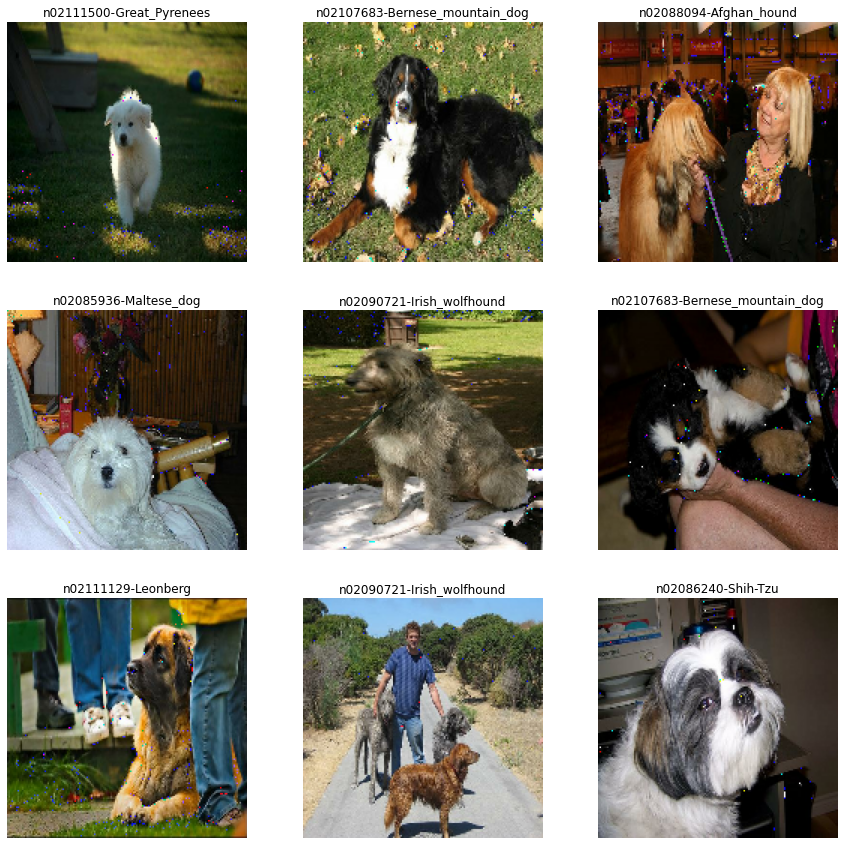

In [65]:
class_names = train_ds.class_names
num_classes = len(class_names)
print(class_names)


plt.figure(figsize=(15, 15))
for images, labels in train_ds.take(1):
  print(labels)
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")


As the original dataset doesn't contain a test set, you will create one. To do so, determine how many batches of data are available in the validation set using tf.data.experimental.cardinality, then move 20% of them to a test set.

In [66]:
val_batches = tf.data.experimental.cardinality(val_ds)
test_dataset = val_ds.take(val_batches // 5)
validation_dataset = val_ds.skip(val_batches // 5)


In [67]:
print('Number of validation batches: %d' % tf.data.experimental.cardinality(validation_dataset))
print('Number of test batches: %d' % tf.data.experimental.cardinality(test_dataset))


Number of validation batches: 12
Number of test batches: 2


### Configure the dataset for performance
Use buffered prefetching to load images from disk without having I/O become blocking. To learn more about this method see the data performance guide.

In [68]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.RandomFlip('horizontal'),
  tf.keras.layers.RandomRotation(0.2),
  tf.keras.layers.RandomZoom(0.2),
  tf.keras.layers.RandomContrast(0.2) 
  
])


In [69]:
#tf.keras.layers.RandomContrast(0.2)  

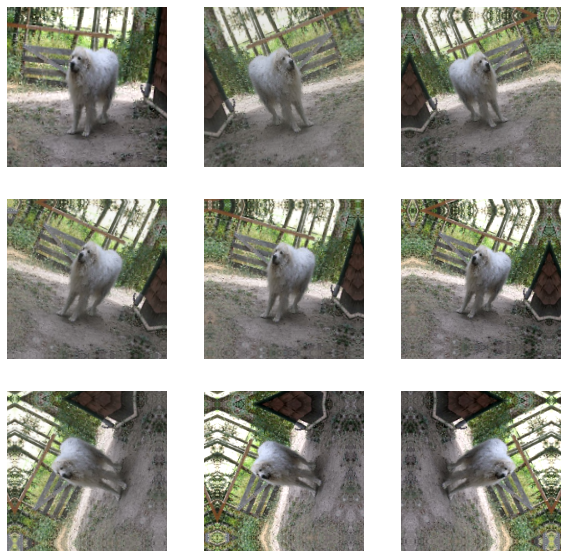

In [70]:
for image, _ in train_ds.take(1):
  plt.figure(figsize=(10, 10))
  first_image = image[0]
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    augmented_image = data_augmentation(tf.expand_dims(first_image, 0))
    plt.imshow(augmented_image[0] / 255)
    plt.axis('off')


In [71]:
preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input

In [72]:
rescale = tf.keras.layers.Rescaling(1./127.5, offset=-1)



### Create the base model from the pre-trained convnets

In [73]:
# Create the base model from the pre-trained model MobileNet V2
print(f"image size before:{IMG_SIZE}")
IMG_SHAPE = IMG_SIZE + (3,)
print(f"image size after:{IMG_SHAPE}")
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')


image size before:(160, 160)
image size after:(160, 160, 3)


This feature extractor converts each 160x160x3 image into a 5x5x1280 block of features. Let's see what it does to an example batch of images:

In [74]:
image_batch, label_batch = next(iter(train_ds))
feature_batch = base_model(image_batch)
print(feature_batch.shape) # shape  of the last layer


(32, 5, 5, 1280)


In [75]:
base_model.trainable = False


In [76]:
#base_model.summary()


In [77]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
feature_batch_average = global_average_layer(feature_batch)
print(feature_batch_average.shape)


(32, 1280)


Apply a tf.keras.layers.Dense layer to convert these features into a single prediction per image. You don't need an activation function here because this prediction will be treated as a logit, or a raw prediction value. Positive numbers predict class 1, negative numbers predict class 0.

In [78]:
prediction_layer = tf.keras.layers.Dense(num_classes, activation='softmax')
prediction_batch = prediction_layer(feature_batch_average)
print(prediction_batch.shape)


(32, 10)


Build a model by chaining together the data augmentation, rescaling, base_model and feature extractor layers using the Keras Functional API. As previously mentioned, use training=False as our model contains a BatchNormalization layer.

In [79]:
inputs = tf.keras.Input(shape=(160, 160, 3))
x = data_augmentation(inputs)
x = preprocess_input(x)
x = base_model(x, training=False)
x = global_average_layer(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = prediction_layer(x)
model = tf.keras.Model(inputs, outputs)


In [80]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])


In [81]:
model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 160, 160, 3)]     0         
                                                                 
 sequential_11 (Sequential)  (None, 160, 160, 3)       0         
                                                                 
 tf.math.truediv (TFOpLambda  (None, 160, 160, 3)      0         
 )                                                               
                                                                 
 tf.math.subtract (TFOpLambd  (None, 160, 160, 3)      0         
 a)                                                              
                                                                 
 mobilenetv2_1.00_160 (Funct  (None, 5, 5, 1280)       2257984   
 ional)                                                          
                                                             

The 2.5 million parameters in MobileNet are frozen, but there are 1.2 thousand trainable parameters in the Dense layer. These are divided between two tf.Variable objects, the weights and biases.

In [82]:
len(model.trainable_variables)


2

In [83]:
initial_epochs = 10

loss0, accuracy0 = model.evaluate(validation_dataset)


12/12 [==============================] - 2s 30ms/step - loss: 2.5148 - accuracy: 0.1227


In [84]:
print("initial loss: {:.2f}".format(loss0))
print("initial accuracy: {:.2f}".format(accuracy0))


initial loss: 2.51
initial accuracy: 0.12


In [85]:
history = model.fit(train_ds,
                    epochs=initial_epochs,
                    validation_data=validation_dataset)


Epoch 1/10
49/49 [==============================] - 16s 197ms/step - loss: 1.3771 - accuracy: 0.5404 - val_loss: 0.4605 - val_accuracy: 0.8721
Epoch 2/10
49/49 [==============================] - 9s 183ms/step - loss: 0.6519 - accuracy: 0.7798 - val_loss: 0.3091 - val_accuracy: 0.9164
Epoch 3/10
49/49 [==============================] - 9s 183ms/step - loss: 0.5353 - accuracy: 0.8004 - val_loss: 0.2665 - val_accuracy: 0.9243
Epoch 4/10
49/49 [==============================] - 9s 177ms/step - loss: 0.5050 - accuracy: 0.8209 - val_loss: 0.2471 - val_accuracy: 0.9321
Epoch 5/10
49/49 [==============================] - 9s 177ms/step - loss: 0.4568 - accuracy: 0.8299 - val_loss: 0.2372 - val_accuracy: 0.9243
Epoch 6/10
49/49 [==============================] - 9s 175ms/step - loss: 0.4541 - accuracy: 0.8299 - val_loss: 0.2376 - val_accuracy: 0.9399
Epoch 7/10
49/49 [==============================] - 9s 174ms/step - loss: 0.4113 - accuracy: 0.8434 - val_loss: 0.2229 - val_accuracy: 0.9347
Epoch

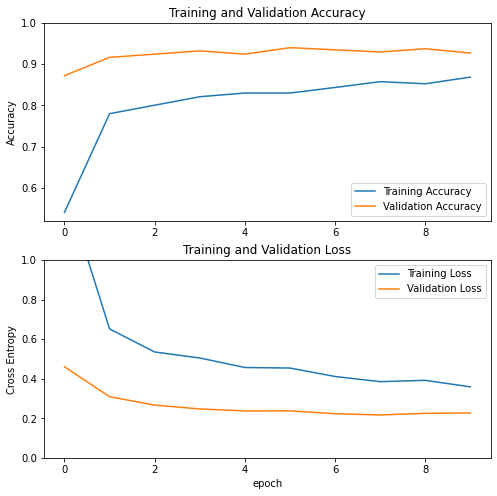

In [86]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()


## Fine tuning

we will train only the last 35 layers

In [87]:
base_model.trainable = True


In [88]:
# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(base_model.layers))

# Fine-tune from this layer onwards
fine_tune_at = 120 #151

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False


Number of layers in the base model:  154


In [89]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])


In [90]:
len(model.trainable_variables)


38

In [91]:
fine_tune_epochs = 30
total_epochs =  initial_epochs + fine_tune_epochs

history_fine = model.fit(train_ds,
                         epochs=total_epochs,
                         initial_epoch=history.epoch[-1],
                         validation_data=validation_dataset)


Epoch 10/40
49/49 [==============================] - 21s 200ms/step - loss: 0.3867 - accuracy: 0.8524 - val_loss: 0.2134 - val_accuracy: 0.9399
Epoch 11/40
49/49 [==============================] - 9s 181ms/step - loss: 0.3287 - accuracy: 0.8768 - val_loss: 0.2159 - val_accuracy: 0.9373
Epoch 12/40
49/49 [==============================] - 9s 180ms/step - loss: 0.2983 - accuracy: 0.8883 - val_loss: 0.2168 - val_accuracy: 0.9295
Epoch 13/40
49/49 [==============================] - 9s 182ms/step - loss: 0.3305 - accuracy: 0.8787 - val_loss: 0.2290 - val_accuracy: 0.9426
Epoch 14/40
49/49 [==============================] - 9s 182ms/step - loss: 0.3075 - accuracy: 0.8896 - val_loss: 0.2191 - val_accuracy: 0.9399
Epoch 15/40
49/49 [==============================] - 9s 182ms/step - loss: 0.3143 - accuracy: 0.8832 - val_loss: 0.2140 - val_accuracy: 0.9426
Epoch 16/40
49/49 [==============================] - 9s 182ms/step - loss: 0.2686 - accuracy: 0.9056 - val_loss: 0.2178 - val_accuracy: 0.942

In [92]:
acc0 =acc
val_acc0=val_acc
loss0 = loss
val_loss0 = val_loss

acc1 = acc0 + history_fine.history['accuracy']
val_acc1 = val_acc0 +history_fine.history['val_accuracy']

loss1 = loss0  + history_fine.history['loss']
val_loss1 = val_acc0 + history_fine.history['val_loss']



we we will train only the last 4 layers

In [93]:
base_model.trainable = True

In [94]:
# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(base_model.layers))

# Fine-tune from this layer onwards
fine_tune_at = 151

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False


Number of layers in the base model:  154


In [95]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])


In [96]:
len(model.trainable_variables)

5

In [97]:
fine_tune_epochs = 30
total_epochs =  initial_epochs + fine_tune_epochs

history_fine = model.fit(train_ds,
                         epochs=total_epochs,
                         initial_epoch=history.epoch[-1],
                         validation_data=validation_dataset)

Epoch 10/40
49/49 [==============================] - 16s 192ms/step - loss: 0.1382 - accuracy: 0.9506 - val_loss: 0.2223 - val_accuracy: 0.9426
Epoch 11/40
49/49 [==============================] - 9s 176ms/step - loss: 0.1509 - accuracy: 0.9461 - val_loss: 0.2215 - val_accuracy: 0.9426
Epoch 12/40
49/49 [==============================] - 9s 177ms/step - loss: 0.1344 - accuracy: 0.9576 - val_loss: 0.2217 - val_accuracy: 0.9426
Epoch 13/40
49/49 [==============================] - 9s 175ms/step - loss: 0.1493 - accuracy: 0.9493 - val_loss: 0.2201 - val_accuracy: 0.9452
Epoch 14/40
49/49 [==============================] - 9s 176ms/step - loss: 0.1210 - accuracy: 0.9596 - val_loss: 0.2202 - val_accuracy: 0.9452
Epoch 15/40
49/49 [==============================] - 9s 176ms/step - loss: 0.1351 - accuracy: 0.9531 - val_loss: 0.2208 - val_accuracy: 0.9452
Epoch 16/40
49/49 [==============================] - 9s 176ms/step - loss: 0.1181 - accuracy: 0.9544 - val_loss: 0.2191 - val_accuracy: 0.945

In [98]:


acc2 = acc0 + history_fine.history['accuracy']
val_acc2 = val_acc0 +history_fine.history['val_accuracy']

loss2 = loss0  + history_fine.history['loss']
val_loss2 = val_acc0 + history_fine.history['val_loss']


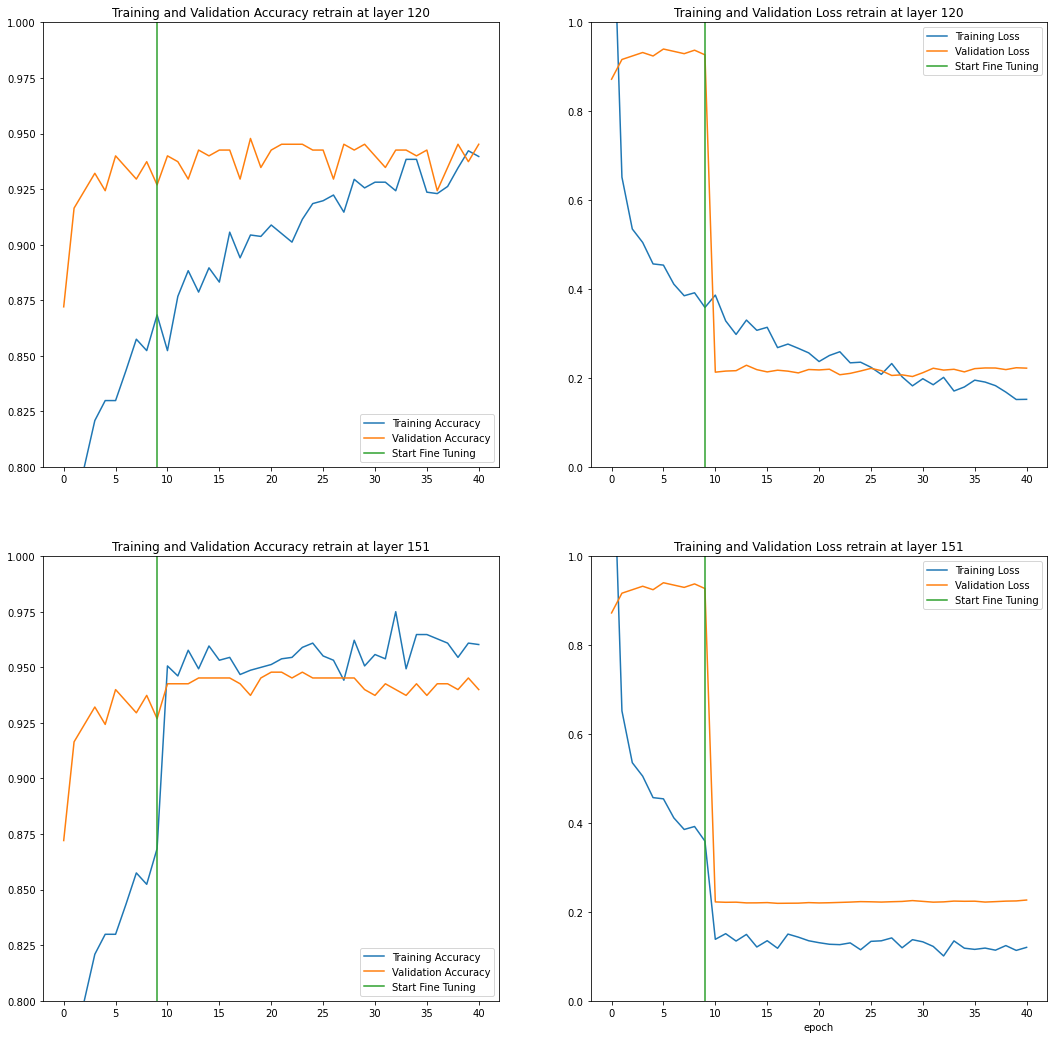

In [99]:
plt.figure(figsize=(18, 18))
plt.subplot(2, 2, 1)
plt.plot(acc1, label='Training Accuracy')
plt.plot(val_acc1, label='Validation Accuracy')
plt.ylim([0.8, 1])
plt.plot([initial_epochs-1,initial_epochs-1],
          plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy retrain at layer 120')

plt.subplot(2, 2, 2)
plt.plot(loss1, label='Training Loss')
plt.plot(val_loss1, label='Validation Loss')
plt.ylim([0, 1.0])
plt.plot([initial_epochs-1,initial_epochs-1],
         plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss retrain at layer 120')


plt.subplot(2, 2, 3)
plt.plot(acc2, label='Training Accuracy')
plt.plot(val_acc2, label='Validation Accuracy')
plt.ylim([0.8, 1])
plt.plot([initial_epochs-1,initial_epochs-1],
          plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy retrain at layer 151')

plt.subplot(2, 2, 4)
plt.plot(loss2, label='Training Loss')
plt.plot(val_loss2, label='Validation Loss')
plt.ylim([0, 1.0])
plt.plot([initial_epochs-1,initial_epochs-1],
         plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss retrain at layer 151')

plt.xlabel('epoch')
plt.show()


The transfert learning model with MobileNet give us roughly 90% accuracy compare to scratch models with give us only 30% accuracy for 10 breeds.

In [100]:
def confusion_matrix(model, data):
    pred = model.predict(data)
    pred = pred.argmax(axis=1)
    true_class = [j.numpy() for i,j in data]
    true_class = np.concatenate([i for i in true_class],axis=None)
    con_mat = tf.math.confusion_matrix(labels=true_class, predictions=pred).numpy()
    con_mat_norm = con_mat#np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)
    
    print(f"trace sum: {np.trace(con_mat_norm)}\nmatrice terms sum {np.sum(con_mat_norm)}")
    fig, ax = plt.subplots(figsize=(8, 8))
    im = ax.imshow(con_mat_norm)

    # Show all ticks and label them with the respective list entries
    ax.set_xticks(np.arange(con_mat_norm.shape[0]), labels=class_names)
    ax.set_yticks(np.arange(con_mat_norm.shape[0]), labels=class_names)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    for i in range(con_mat_norm.shape[0]):
        for j in range(con_mat_norm.shape[0]):
            text = ax.text(j, i, con_mat_norm[i, j],
                           ha="center", va="center", color="w")

    ax.set_title("confusion matrix")
    fig.tight_layout()
    plt.show()

14/14 [==============================] - 1s 21ms/step
trace sum: 417
matrice terms sum 447


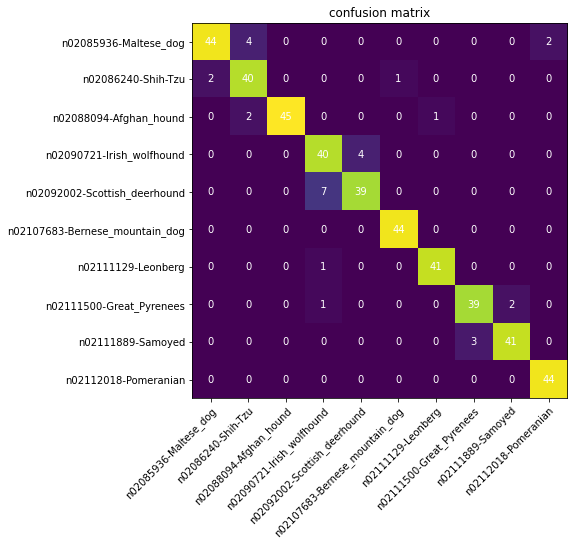

In [101]:
confusion_matrix(model,val_ds)


we see that our model have problems to clearly identify Irish-wolfound and Scottish-deerhound breeds.

## Save Model

In [102]:
filePath = path + '/app/model.h5'
if os.path.isfile(filePath) is False:
    model.save(filePath)

In [103]:
filePath = path + '/app/class_names.pickle'
with open(filePath,'wb') as f:
    pickle.dump(class_names,f,pickle.HIGHEST_PROTOCOL)

---

## Improve Transffert learning

In [104]:
kerasImages = path +'kerasImages/'
trainDir = kerasImages + 'train/'
testDir = kerasImages + 'test/'
valDir = kerasImages + 'val/'

In [105]:
batch_size = 32
minHeight = 224
minWidth = 224
IMG_SIZE = (minHeight, minWidth)

In [106]:
train_ds =tf.keras.utils.image_dataset_from_directory(
    trainDir,
    
    color_mode='rgb',
    batch_size=batch_size,
    image_size=(minHeight, minWidth),
    shuffle=True,
    labels="inferred",
    label_mode='int',
    seed=133,
    validation_split=None,
    #subset="training",
    interpolation='bicubic', #'bilinear', bicubic same thing as pillow
    follow_links=False, # follow symlink
    crop_to_aspect_ratio=False,
    
    
)


Found 1558 files belonging to 10 classes.


In [107]:
val_ds =tf.keras.utils.image_dataset_from_directory(
    valDir ,
    
    color_mode='rgb',
    batch_size=batch_size,
    image_size=(minHeight, minWidth),
    shuffle=False,
    labels="inferred",
    label_mode='int',
    seed=133,
    validation_split=None,
    #subset="validation",
    interpolation= 'bicubic', #'bilinear', bicubic same thing as pillow
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 447 files belonging to 10 classes.


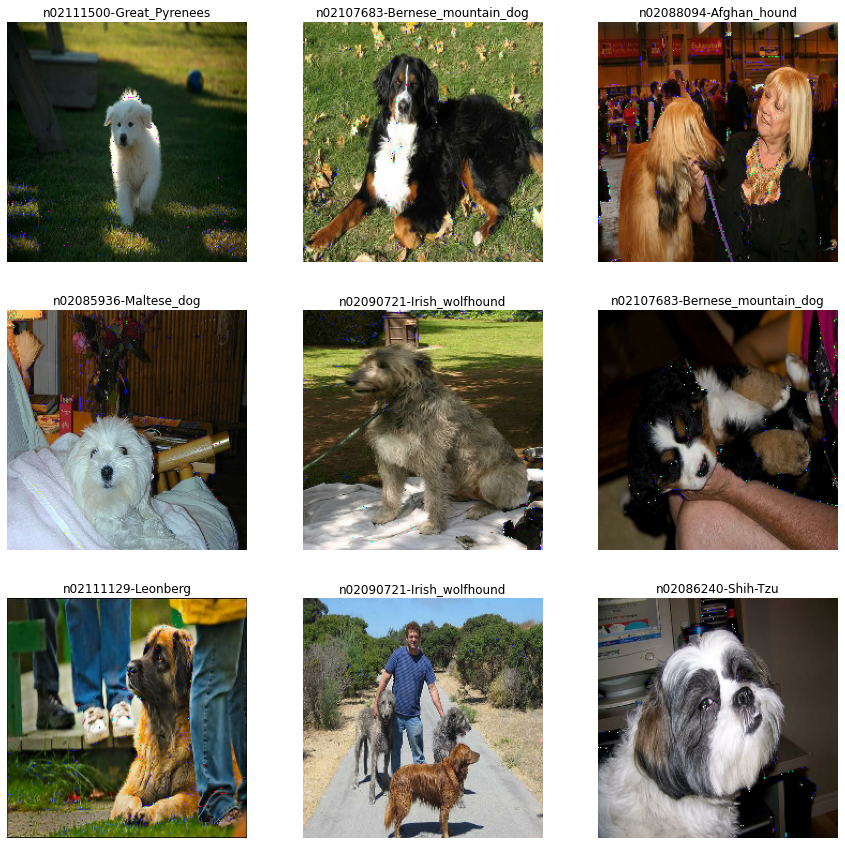

In [108]:
class_names = train_ds.class_names
num_classes = len(class_names)

plt.figure(figsize=(15, 15))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")


In [109]:
val_batches = tf.data.experimental.cardinality(val_ds)
test_dataset = val_ds.take(val_batches // 5)
validation_dataset = val_ds.skip(val_batches // 5)


In [110]:
print('Number of validation batches: %d' % tf.data.experimental.cardinality(validation_dataset))
print('Number of test batches: %d' % tf.data.experimental.cardinality(test_dataset))

Number of validation batches: 12
Number of test batches: 2


In [111]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.RandomFlip('horizontal'),
  tf.keras.layers.RandomRotation(0.2),
  tf.keras.layers.RandomZoom(0.2),
])


In [112]:
preprocess_input = tf.keras.applications.efficientnet_v2.preprocess_input

In [113]:
rescale = tf.keras.layers.Rescaling(1./127.5, offset=-1)

In [114]:
# Create the base model from the pre-trained model MobileNet V2
print(f"image size before:{IMG_SIZE}")
IMG_SHAPE = IMG_SIZE + (3,)
print(f"image size after:{IMG_SHAPE}")
base_model = tf.keras.applications.EfficientNetV2L(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')


image size before:(224, 224)
image size after:(224, 224, 3)


In [115]:
image_batch, label_batch = next(iter(train_ds))
feature_batch = base_model(image_batch)
print(feature_batch.shape) # shape  of the last layer


(32, 7, 7, 1280)


In [116]:
base_model.trainable = False


In [117]:
base_model.summary()

Model: "efficientnetv2-l"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling_3 (Rescaling)        (None, 224, 224, 3)  0           ['input_3[0][0]']                
                                                                                                  
 stem_conv (Conv2D)             (None, 112, 112, 32  864         ['rescaling_3[0][0]']            
                                )                                                                 
                                                                                   

In [118]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
feature_batch_average = global_average_layer(feature_batch)
print(feature_batch_average.shape)


(32, 1280)


In [119]:
prediction_layer = tf.keras.layers.Dense(num_classes, activation='softmax')
prediction_batch = prediction_layer(feature_batch_average)
print(prediction_batch.shape)


(32, 10)


In [120]:
inputs = tf.keras.Input(shape=(224, 224, 3))
x = data_augmentation(inputs)
x = preprocess_input(x)
x = base_model(x, training=False)
x = global_average_layer(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = prediction_layer(x)
model = tf.keras.Model(inputs, outputs)

In [121]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])


In [122]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 sequential_12 (Sequential)  (None, 224, 224, 3)       0         
                                                                 
 efficientnetv2-l (Functiona  (None, 7, 7, 1280)       117746848 
 l)                                                              
                                                                 
 global_average_pooling2d_1   (None, 1280)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dropout_8 (Dropout)         (None, 1280)              0         
                                                                 
 dense_20 (Dense)            (None, 10)                1281

In [123]:
len(model.trainable_variables)

2

In [124]:
initial_epochs = 10

loss0, accuracy0 = model.evaluate(validation_dataset)


12/12 [==============================] - 13s 277ms/step - loss: 2.3409 - accuracy: 0.1253


In [125]:
print("initial loss: {:.2f}".format(loss0))
print("initial accuracy: {:.2f}".format(accuracy0))


initial loss: 2.34
initial accuracy: 0.13


In [126]:
history = model.fit(train_ds,
                    epochs=initial_epochs,
                    validation_data=validation_dataset)


Epoch 1/10
49/49 [==============================] - 43s 391ms/step - loss: 0.9970 - accuracy: 0.8248 - val_loss: 0.2570 - val_accuracy: 0.9608
Epoch 2/10
49/49 [==============================] - 18s 372ms/step - loss: 0.2783 - accuracy: 0.9332 - val_loss: 0.1506 - val_accuracy: 0.9608
Epoch 3/10
49/49 [==============================] - 18s 372ms/step - loss: 0.2270 - accuracy: 0.9352 - val_loss: 0.1317 - val_accuracy: 0.9634
Epoch 4/10
49/49 [==============================] - 18s 373ms/step - loss: 0.1923 - accuracy: 0.9474 - val_loss: 0.1237 - val_accuracy: 0.9634
Epoch 5/10
49/49 [==============================] - 18s 375ms/step - loss: 0.2045 - accuracy: 0.9352 - val_loss: 0.1217 - val_accuracy: 0.9661
Epoch 6/10
49/49 [==============================] - 18s 373ms/step - loss: 0.1710 - accuracy: 0.9480 - val_loss: 0.1162 - val_accuracy: 0.9634
Epoch 7/10
49/49 [==============================] - 19s 375ms/step - loss: 0.1646 - accuracy: 0.9487 - val_loss: 0.1150 - val_accuracy: 0.9634

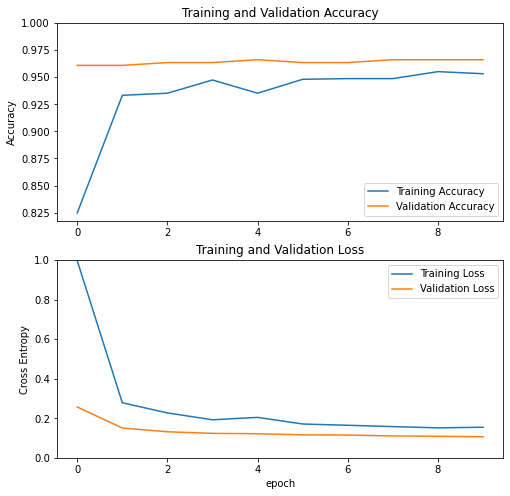

In [127]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

14/14 [==============================] - 9s 224ms/step
trace sum: 433
matrice terms sum 447


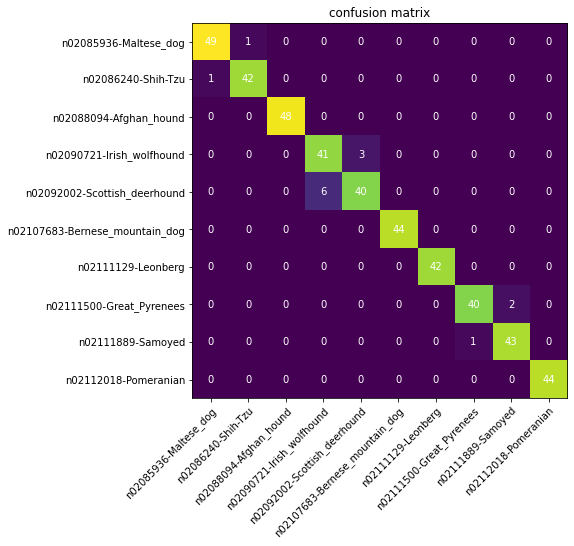

In [128]:
confusion_matrix(model,val_ds)

## Fine tuning

In [129]:
base_model.trainable = True

In [130]:
# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(base_model.layers))

# Fine-tune from this layer onwards
fine_tune_at = 1025

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False


Number of layers in the base model:  1028


In [131]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])


In [132]:
len(model.trainable_variables)

5

In [133]:
fine_tune_epochs = 10
total_epochs =  initial_epochs + fine_tune_epochs

history_fine = model.fit(train_ds,
                         epochs=total_epochs,
                         initial_epoch=history.epoch[-1],
                         validation_data=validation_dataset)


Epoch 10/20
49/49 [==============================] - 48s 501ms/step - loss: 0.2572 - accuracy: 0.9230 - val_loss: 0.1617 - val_accuracy: 0.9556
Epoch 11/20
49/49 [==============================] - 18s 374ms/step - loss: 0.1506 - accuracy: 0.9499 - val_loss: 0.1179 - val_accuracy: 0.9661
Epoch 12/20
49/49 [==============================] - 18s 373ms/step - loss: 0.1280 - accuracy: 0.9634 - val_loss: 0.1230 - val_accuracy: 0.9634
Epoch 13/20
49/49 [==============================] - 19s 376ms/step - loss: 0.1086 - accuracy: 0.9647 - val_loss: 0.1065 - val_accuracy: 0.9687
Epoch 14/20
49/49 [==============================] - 19s 376ms/step - loss: 0.1068 - accuracy: 0.9628 - val_loss: 0.1284 - val_accuracy: 0.9661
Epoch 15/20
49/49 [==============================] - 19s 376ms/step - loss: 0.0963 - accuracy: 0.9698 - val_loss: 0.1096 - val_accuracy: 0.9687
Epoch 16/20
49/49 [==============================] - 19s 381ms/step - loss: 0.1325 - accuracy: 0.9576 - val_loss: 0.1117 - val_accuracy:

In [134]:
acc += history_fine.history['accuracy']
val_acc += history_fine.history['val_accuracy']

loss += history_fine.history['loss']
val_loss += history_fine.history['val_loss']



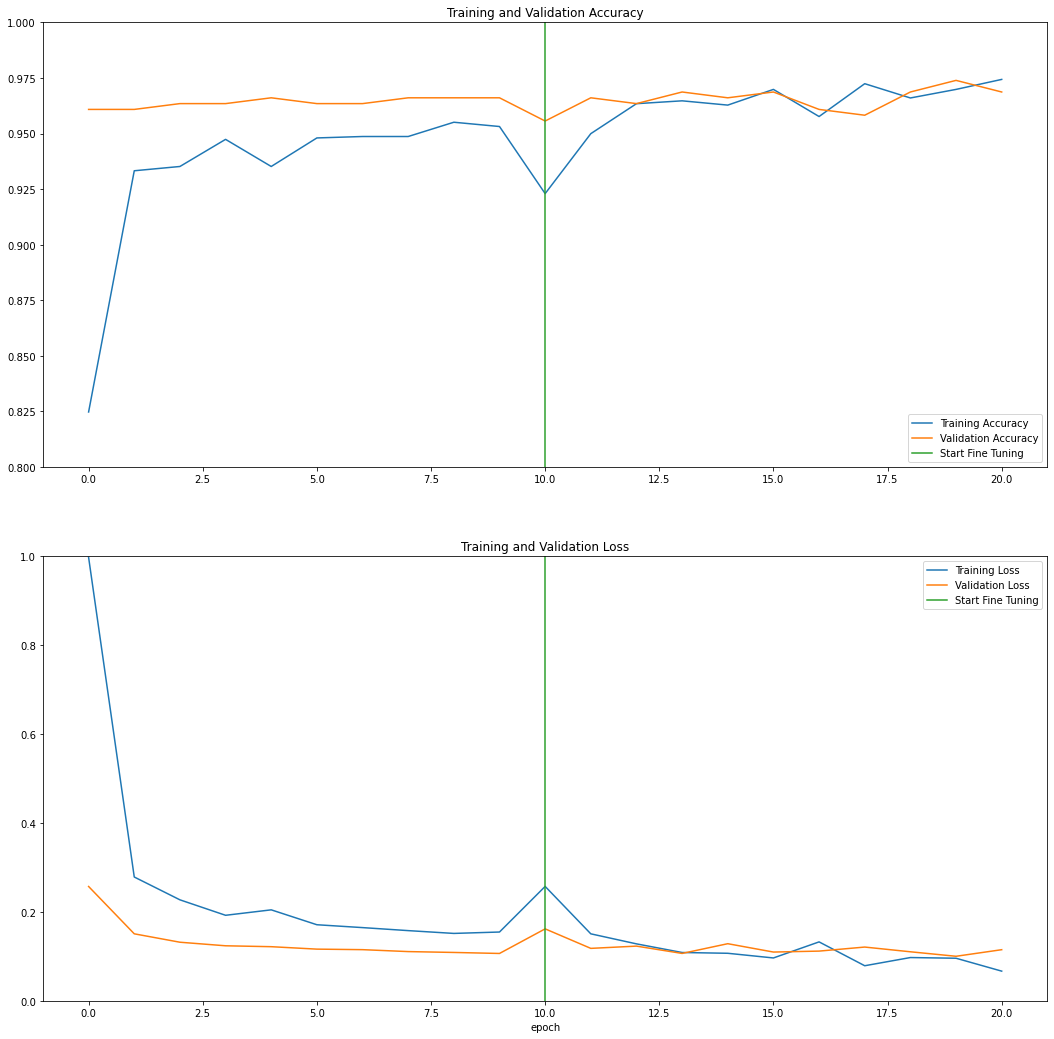

In [135]:
plt.figure(figsize=(18, 18))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.ylim([0.8, 1])
plt.plot([initial_epochs,initial_epochs],
          plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.ylim([0, 1.0])
plt.plot([initial_epochs,initial_epochs],
         plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

14/14 [==============================] - 9s 224ms/step
trace sum: 434
matrice terms sum 447


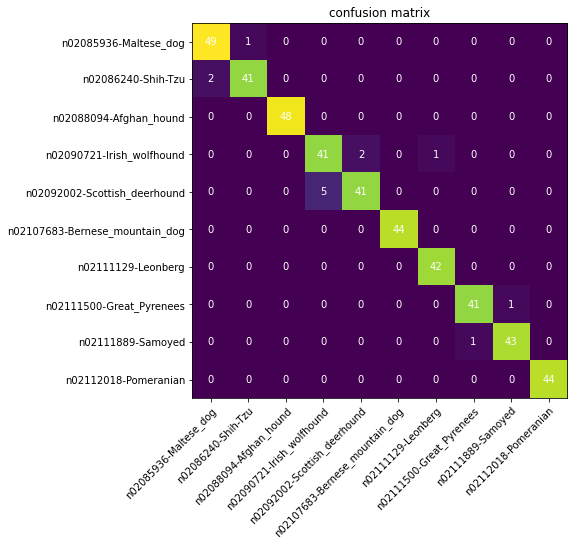

In [136]:
confusion_matrix(model,val_ds)